<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_fountain-pen-book-ballpoint-pen.png" align="left" hspace="25px" vspace="25px" width="100" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:  red">Highlights</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The aim of this project is to present a proper approach to the questioning of datasets while maintaining the main objective of extracting various interesting facts through EDA.</li>
    <li>It uses <span style="color:#122ecc;"> pandas, numpy, matplot, seaborn and numpy, sklearn.impute, plotly.express, plotly.graph_objects, plotly.subplots, plotly.io, scipy.stats, warnings, pio.renderers </span>libraries.</li>  
</ul>
</div>

<center><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/carInssuranceClaimGif.gif" align="center" hspace="10px" vspace="10px" width=80% height=100% ></center>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/DataAnalysislogo.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Data Exploration and Preprocessing</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Downloading, cleaning, and preparing the dataset</li> 
</ul>

In [2]:
# Import all the required libraries
import pandas as pd #data manipulation and analysis library
import matplotlib #plotting library
import matplotlib.pyplot as plt
import seaborn as sns #statistical data visualization library
import numpy as np #numerical computing library
from sklearn.impute import SimpleImputer #missing value imputation
import plotly.express as px #high-level interface for interactive visualizations
import plotly.graph_objects as go #low-level interface for customizing plots
from plotly.subplots import make_subplots #creating subplots in a single figure
import plotly.io as pio #rendering and displaying Plotly figures
pio.renderers.default = "iframe"
from scipy.stats import skew #computing skewness
import warnings #handling warnings.
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [3]:
# load the dataset into pandas dataframe
customersRecordsforCarInssuranceDataframe = pd.read_csv('/Users/MacBookair/Downloads/car_insurance_claim.csv')

In [4]:
customersRecordsforCarInssuranceDataframe.head(5).style.background_gradient(cmap='Pastel2')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.000000,0,11.000000,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.000000,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.000000,0,11.000000,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.000000,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.000000,0,11.000000,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.000000,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.000000,1,10.000000,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.000000,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.000000,0,14.000000,nan,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.000000,0,Highly Urban/ Urban


In [5]:
# Check the no. of columns & rows

print('The Car Inssurance Dataset contains {:,d} rows & {} columns'.format(customersRecordsforCarInssuranceDataframe.shape[0],customersRecordsforCarInssuranceDataframe.shape[1]))

The Car Inssurance Dataset contains 10,302 rows & 27 columns


In [6]:
customersRecordsforCarInssuranceDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [7]:
colExplanation=[ "Unique identifier for each customer.", "Number of kids the customer has who are of driving age.", "Date of birth of the customer.", "Age of the customer.", 
                "Number of kids the customer has at home.", "Years on the job (number of years the customer has been employed).", "Income of the customer.",
                "Indicates whether the customer is a single parent (Yes/No).", "Value of the customer's home.", "Marital status of the customer (Yes/No).",
                "Gender of the customer (M/F).", "Education level of the customer.", "Occupation of the customer.", "Daily travel time to work.",
                "Purpose of car usage (Private/Commercial).", "Value of the customer's car.", "Time in force (Years).",  "Type of car.", 
                "Indicates whether the customer owns a red car (yes/no).", "Total amount of previous claims.", "Number of claims reported.", 
                "Indicates whether the customer's driver's license has been revoked (Yes/No).", "Number of motor vehicle record points.", "Possible future claims",
                "Age of the customer's car.", "Indicates whether a claim was filed (1/0).", " Urbanicity type ((Highly Urban/Urban)/(Highly Rural/Rural))."
]
colExplanationDf = pd.DataFrame({
    'Variables': customersRecordsforCarInssuranceDataframe.columns,
    'Explanation': colExplanation
})
colExplanationDf.style.background_gradient()

,Variables,Explanation
0,ID,Unique identifier for each customer.
1,KIDSDRIV,Number of kids the customer has who are of driving age.
2,BIRTH,Date of birth of the customer.
3,AGE,Age of the customer.
4,HOMEKIDS,Number of kids the customer has at home.
5,YOJ,Years on the job (number of years the customer has been employed).
6,INCOME,Income of the customer.
7,PARENT1,Indicates whether the customer is a single parent (Yes/No).
8,HOME_VAL,Value of the customer's home.
9,MSTATUS,Marital status of the customer (Yes/No).


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/DataPreprocessing.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Data Preprocessing</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Analyze the dataset for data preprocessing, which involved cleaning, transforming, and organizing the data to prepare it for further analysis and modeling.</li> 
</ul>

In [8]:
#Preparation and Cleaning of Dataset

# Convert Date into Datetime Feature
DateFormattedrCarInssuranceDataframe = customersRecordsforCarInssuranceDataframe.copy()
birthYear= customersRecordsforCarInssuranceDataframe['BIRTH'].tolist()

if birthYear[0]=='16MAR39':
    formattedBirthDate=[]

    for items in range (0, len(birthYear)):
        splittingLetter= birthYear[items][4]
        years = birthYear[items].split(splittingLetter)
        splittingLetter = splittingLetter+'19'
        formattedBirthDate.append(years[0]+splittingLetter+years[1])

DateFormattedrCarInssuranceDataframe['BIRTH']= formattedBirthDate

DateFormattedrCarInssuranceDataframe['BIRTH'] = pd.to_datetime(DateFormattedrCarInssuranceDataframe['BIRTH'])

#Cleaning values with unnecessary string elements.
CarInssuranceDataframeCleaning = DateFormattedrCarInssuranceDataframe.copy()

for col in CarInssuranceDataframeCleaning:
    row=[]
    for items in CarInssuranceDataframeCleaning[col]:
        if type(items)==str:
            if items.find('z_') >= 0:
                splititems = items.split('z_')
                row.append(splititems[1])
            elif items.find('<') >= 0:
                splititems = items.split('<')
                row.append(splititems[1])
            else:
                row.append(items)
        else:
            row.append(items)
    CarInssuranceDataframeCleaning[col]=row

#Preparing numeric values for comparisons
PreparedCarInssuranceDataframe=CarInssuranceDataframeCleaning.copy()
income = PreparedCarInssuranceDataframe['INCOME'].tolist()
homeVal = PreparedCarInssuranceDataframe['HOME_VAL'].tolist()
BlueBookVal = PreparedCarInssuranceDataframe['BLUEBOOK'].tolist()
OldClaimVal = PreparedCarInssuranceDataframe['OLDCLAIM'].tolist()
ClaimAmount = PreparedCarInssuranceDataframe['CLM_AMT'].tolist()

formattedIncome=[]
formattedHomeValue=[]
formattedBlueBook=[]
formattedOldClaim=[]
formattedClaimAmount=[]

for items in range (0,len(income)):
    strincome = str(income[items])
    strHomeVal = str(homeVal[items])
    strBlueBook = str(BlueBookVal[items])
    strOldClaim = str(OldClaimVal[items])
    strClaimAmount = str(ClaimAmount[items])
    
    strincome=strincome.replace(",", "")
    strHomeVal=strHomeVal.replace(",", "")
    strBlueBook=strBlueBook.replace(",", "")
    strOldClaim=strOldClaim.replace(",", "")
    strClaimAmount=strClaimAmount.replace(",","")
    
    if strincome.find('$') >= 0 :
        incomes = strincome.split('$')
        formattedIncome.append(float(incomes[1]))
    else:
        formattedIncome.append(float(strincome))

    if strHomeVal.find('$') >= 0:
        homeVals = strHomeVal.split('$')
        formattedHomeValue.append(float(homeVals[1]))
    else :
        formattedHomeValue.append(float(strHomeVal))
        
    if strBlueBook.find('$') >= 0:
        BlueBookVals = strBlueBook.split('$')
        formattedBlueBook.append(float(BlueBookVals[1]))
    else:
        formattedBlueBook.append(float(strBlueBook))
        
    if strOldClaim.find('$') >= 0:
        OldClaimVals = strOldClaim.split('$')
        formattedOldClaim.append(float(OldClaimVals[1]))
    else:
        formattedOldClaim.append(float(strOldClaim))
    
    if strClaimAmount.find('$') >= 0:
        ClaimAmountVals = strClaimAmount.split('$')
        formattedClaimAmount.append(float(ClaimAmountVals[1]))
    else:
        formattedClaimAmount.append(float(strClaimAmount))
    
PreparedCarInssuranceDataframe['INCOME'] = formattedIncome
PreparedCarInssuranceDataframe['HOME_VAL'] = formattedHomeValue
PreparedCarInssuranceDataframe['BLUEBOOK'] = formattedBlueBook
PreparedCarInssuranceDataframe['OLDCLAIM'] = formattedOldClaim
PreparedCarInssuranceDataframe['CLM_AMT'] = formattedClaimAmount
PreparedCarInssuranceDataframe = PreparedCarInssuranceDataframe.rename(columns={'INCOME': 'INCOME($)', 'HOME_VAL': 'HOME_VAL($)', 'BLUEBOOK': 'BLUEBOOK($)', 'OLDCLAIM': 
                                                                                'OLDCLAIM($)', 'CLM_AMT': 'CLM_AMT($)'})

In [9]:
PreparedCarInssuranceDataframe.head(5).style.background_gradient(cmap='Pastel1')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,CAR_TYPE,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939-03-16 00:00:00,60.000000,0,11.000000,67349.000000,No,0.000000,No,M,PhD,Professional,14,Private,14230.000000,11,Minivan,yes,4461.000000,2,No,3,0.000000,18.000000,0,Highly Urban/ Urban
1,132761049,0,1956-01-21 00:00:00,43.000000,0,11.000000,91449.000000,No,257252.000000,No,M,High School,Blue Collar,22,Commercial,14940.000000,1,Minivan,yes,0.000000,0,No,0,0.000000,1.000000,0,Highly Urban/ Urban
2,921317019,0,1951-11-18 00:00:00,48.000000,0,11.000000,52881.000000,No,0.000000,No,M,Bachelors,Manager,26,Private,21970.000000,1,Van,yes,0.000000,0,No,2,0.000000,10.000000,0,Highly Urban/ Urban
3,727598473,0,1964-03-05 00:00:00,35.000000,1,10.000000,16039.000000,No,124191.000000,Yes,F,High School,Clerical,5,Private,4010.000000,4,SUV,no,38690.000000,2,No,3,0.000000,10.000000,0,Highly Urban/ Urban
4,450221861,0,1948-06-05 00:00:00,51.000000,0,14.000000,nan,No,306251.000000,Yes,M,High School,Blue Collar,32,Private,15440.000000,7,Minivan,yes,0.000000,0,No,0,0.000000,6.000000,0,Highly Urban/ Urban


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/frequency.png" align="left" hspace="25px" vspace="5px" width="170" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Frequency Plots</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Analyze the dataset using frequency plots to visualize the distribution of variables.</li> 
</ul>

In [10]:
# Create subplots for pie charts
fig = make_subplots(
    rows=5, cols=3,
    specs=[[{}, {},{}],
           [{}, {},{}],
          [{}, {"colspan": 2}, None],
          [{}, {},{}],
          [{}, {},{}]], subplot_titles=("AGE","KIDSDRIV", "HOMEKIDS", "YOJ", "INCOME($)", "HOME_VAL($)", "BLUEBOOK($)", "TRAVTIME", "TIF", "OLDCLAIM($)", "CLM_FREQ","MVR_PTS","CLM_AMT($)","CAR_AGE")
)
# Plot the bars

#Frequency count for AGE
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['AGE'], histfunc="count", hoverinfo="x+y", marker=dict(color=[3, 4, 5], coloraxis="coloraxis")), 1, 1)

#Frequency count for KIDSDRIV
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['KIDSDRIV'].unique(), y=PreparedCarInssuranceDataframe['KIDSDRIV'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 1, 2)

#Frequency count for HOMEKIDS
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['HOMEKIDS'].unique(), y=PreparedCarInssuranceDataframe['HOMEKIDS'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 1, 3)

#Frequency count for YOJ
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['YOJ'].unique(), y=PreparedCarInssuranceDataframe['YOJ'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 1)

#Frequency count for INCOME($)
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['INCOME($)'], histfunc="count", hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 2)

#Frequency count for HOME_VAL($)
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['HOME_VAL($)'],  histfunc="count", hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 3)

#Frequency count for BLUEBOOK($)
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['BLUEBOOK($)'], histfunc="count", hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 3, 1)

#Frequency count for TRAVTIME
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['TRAVTIME'].unique(), y=PreparedCarInssuranceDataframe['TRAVTIME'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 3, 2)

#Frequency count for TIF
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['TIF'].unique(), y=PreparedCarInssuranceDataframe['TIF'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 4, 1)

#Frequency count for OLDCLAIM($)
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['OLDCLAIM($)'], histfunc="count", hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 4, 2)

#Frequency count for CLM_FREQ
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['CLM_FREQ'].unique(), y=PreparedCarInssuranceDataframe['CLM_FREQ'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 4, 3)

#Frequency count for MVR_PTS
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['MVR_PTS'].unique(), y=PreparedCarInssuranceDataframe['MVR_PTS'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 5, 1)

#Frequency count for CLM_AMT($)
fig.add_trace(go.Histogram(x=PreparedCarInssuranceDataframe['CLM_AMT($)'], histfunc="count", hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 5, 2)

#Frequency count for CAR_AGE
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['CAR_AGE'].unique(), y=PreparedCarInssuranceDataframe['CAR_AGE'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 5, 3)

fig.update_layout(bargap=0.03, height=1500, width=1400, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="FREQUENCY FOR CONTINUOUS VARIABLES", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

# Update xaxis properties
fig.update_xaxes(title_text="AGE", row=1, col=1)
fig.update_xaxes(title_text="KIDSDRIV", row=1, col=2)
fig.update_xaxes(title_text="HOMEKIDS", row=1, col=3)
fig.update_xaxes(title_text="YOJ", row=2, col=1)
fig.update_xaxes(title_text="INCOME($)", row=2, col=2)
fig.update_xaxes(title_text="HOME_VAL($)",row=2, col=3)
fig.update_xaxes(title_text="BLUEBOOK($)", row=3, col=1)
fig.update_xaxes(title_text="TRAVTIME", row=3, col=2)
fig.update_xaxes(title_text="TIF", row=4, col=1)
fig.update_xaxes(title_text="OLDCLAIM($)", range=[0, 20000], row=4, col=2)
fig.update_xaxes(title_text="CLM_FREQ", row=4, col=3)
fig.update_xaxes(title_text="MVR_PTS", row=5, col=1)
fig.update_xaxes(title_text="CLM_AMT($)", range=[0, 20000], row=5, col=2)
fig.update_xaxes(title_text="CAR_AGE", row=5, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="FREQUENCY", row=1, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=1, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=1, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=4, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=4, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=4, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=5, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=5, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=5, col=3)
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> During the analysis of continuous variables, frequency plots are used to analyze the <span style="font-weight: bold; color:blue;">distribution</span>, <span style="font-weight: bold; color:blue;">frequency</span>, <span style="font-weight: bold; color:blue;">central tendency</span>, <span style="font-weight: bold; color:blue;">spread</span>, and <span style="font-weight: bold; color:blue;">potential outliers</span>. These plots are providing insights into the overall characteristics and variations in the dataset and also confirming that the values of the variables are <span style="font-weight: bold; color:blue;">non-negative</span>.</li>
    <br>
</ul>
</div>

In [11]:
# Create subplots for pie charts
fig = make_subplots(rows=4, cols=3,specs=[
           [{}, {},{}],
           [{}, {},{}],
           [{}, {},{}],
           [{}, {}, None]], subplot_titles=("Single Parent","Marital Status", "Gender", "Level of Education", "Occupation", "Car Usage", "Car Type", "Red Cars", "Revoked Licenses", "City", "No Claim or Claim"))

# Plot the bars

#Frequency count for PARENT1
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['PARENT1'].unique(), y=PreparedCarInssuranceDataframe['PARENT1'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 1, 1)

#Frequency count for MSTATUS
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['MSTATUS'].unique(), y=PreparedCarInssuranceDataframe['MSTATUS'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 1, 2)

#Frequency count for GENDER
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['GENDER'].unique(), y=PreparedCarInssuranceDataframe['GENDER'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 1, 3)

#Frequency count for EDUCATION
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['EDUCATION'].unique(), y=PreparedCarInssuranceDataframe['EDUCATION'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 1)

#Frequency count for OCCUPATION
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['OCCUPATION'].unique(), y=PreparedCarInssuranceDataframe['OCCUPATION'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 2)

#Frequency count for CAR_USE
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['CAR_USE'].unique(), y=PreparedCarInssuranceDataframe['CAR_USE'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 2, 3)

#Frequency count for CAR_TYPE
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['CAR_TYPE'].unique(), y=PreparedCarInssuranceDataframe['CAR_TYPE'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 3, 1)

#Frequency count for RED_CAR
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['RED_CAR'].unique(), y=PreparedCarInssuranceDataframe['RED_CAR'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 3, 2)

#Frequency count for REVOKED
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['REVOKED'].unique(), y=PreparedCarInssuranceDataframe['REVOKED'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 3, 3)

#Frequency count for URBANICITY
fig.add_trace(go.Bar(x=PreparedCarInssuranceDataframe['URBANICITY'].unique(), y=PreparedCarInssuranceDataframe['URBANICITY'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 4, 1)

#Frequency count for URBANICITY
fig.add_trace(go.Bar(x= list(map(str,PreparedCarInssuranceDataframe['CLAIM_FLAG'].unique())), y=PreparedCarInssuranceDataframe['CLAIM_FLAG'].value_counts(sort=False), hoverinfo="x+y", marker=dict(color=[4, 5, 6], coloraxis="coloraxis")), 4, 2)

fig.update_layout(bargap=0.01, height=1250, width=1400, coloraxis=dict(colorscale='sunsetdark'), showlegend=False, title_text="FREQUENCY FOR DISCRETE VARIABLES", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

# Update xaxis properties
fig.update_xaxes(title_text="PARENT1", row=1, col=1)
fig.update_xaxes(title_text="MSTATUS", row=1, col=2)
fig.update_xaxes(title_text="GENDER", row=1, col=3)
fig.update_xaxes(title_text="EDUCATION", row=2, col=1)
fig.update_xaxes(title_text="OCCUPATION", row=2, col=2)
fig.update_xaxes(title_text="CAR_USE",row=2, col=3)
fig.update_xaxes(title_text="CAR_TYPE", row=3, col=1)
fig.update_xaxes(title_text="RED_CAR", row=3, col=2)
fig.update_xaxes(title_text="REVOKED", row=3, col=3)
fig.update_xaxes(title_text="URBANICITY", row=4, col=1)
fig.update_xaxes(title_text="CLAIM_FLAG", row=4, col=2)


# Update yaxis properties
fig.update_yaxes(title_text="FREQUENCY", row=1, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=1, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=1, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=2, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=3)
fig.update_yaxes(title_text="FREQUENCY", row=4, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=4, col=2)

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>During the analysis of discrete variables, frequency plots are used to analyze the distribution, frequency, central tendency, spread, and potential outliers. These plots are providing insights into the overall characteristics and variations in the dataset.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/DescriptiveStatics.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Descriptive statistics</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Descriptive statistics summarize important data features using a single numerical value.</li> 
</ul>

In [12]:
#Extract numeric columns
numericData = PreparedCarInssuranceDataframe.select_dtypes(include=np.number).columns.tolist()

CarInssuranceDataframeDescriptiveStatics = PreparedCarInssuranceDataframe[numericData[1:]].describe().T
CarInssuranceDataframeDescriptiveStatics['median'] = PreparedCarInssuranceDataframe[numericData[1:]].median().T
CarInssuranceDataframeDescriptiveStatics['mode'] = PreparedCarInssuranceDataframe[numericData[1:]].mode().T
CarInssuranceDataframeDescriptiveStatics['range'] = (CarInssuranceDataframeDescriptiveStatics['max']-CarInssuranceDataframeDescriptiveStatics['min']).T
CarInssuranceDataframeDescriptiveStatics['variance'] = np.var(PreparedCarInssuranceDataframe[numericData[1:]])
CarInssuranceDataframeDescriptiveStatics['skew'] = PreparedCarInssuranceDataframe[numericData[1:]].skew()
CarInssuranceDataframeDescriptiveStatics['kurt'] = PreparedCarInssuranceDataframe[numericData[1:]].kurt()

CarInssuranceDataframeDescriptiveStatics.style.background_gradient(cmap='icefire')

,count,mean,std,min,25%,50%,75%,max,median,mode,range,variance,skew,kurt
KIDSDRIV,10302.000000,0.169288,0.506512,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.256529,3.342868,11.676518
AGE,10295.000000,44.837397,8.606445,16.000000,39.000000,45.000000,51.000000,81.000000,45.000000,46.000000,65.000000,74.063701,-0.034541,-0.080903
HOMEKIDS,10302.000000,0.720443,1.116323,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,5.000000,1.246057,1.336678,0.629346
YOJ,9754.000000,10.474062,4.108943,0.000000,9.000000,11.000000,13.000000,23.000000,11.000000,12.000000,23.000000,16.881683,-1.200823,1.144802
INCOME($),9732.000000,61572.073263,47457.202749,0.000000,27584.000000,53529.000000,86166.000000,367030.000000,53529.000000,0.000000,367030.000000,2251954672.108176,1.161670,1.988794
HOME_VAL($),9727.000000,154523.018608,129188.439405,0.000000,0.000000,160661.000000,238256.000000,885282.000000,160661.000000,0.000000,885282.000000,16687937068.994307,0.491969,-0.035400
TRAVTIME,10302.000000,33.416424,15.869687,5.000000,22.000000,33.000000,44.000000,142.000000,33.000000,5.000000,137.000000,251.822514,0.435527,0.594656
BLUEBOOK($),10302.000000,15659.923316,8428.765264,1500.000000,9200.000000,14400.000000,20890.000000,69740.000000,14400.000000,1500.000000,68240.000000,71037187.734364,0.769381,0.652191
TIF,10302.000000,5.329159,4.110795,1.000000,1.000000,4.000000,7.000000,25.000000,4.000000,1.000000,24.000000,16.896993,0.899415,0.479709
OLDCLAIM($),10302.000000,4033.977868,8733.143119,0.000000,0.000000,0.000000,4647.500000,57037.000000,0.000000,0.000000,57037.000000,76260385.531834,3.119755,9.897969


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li><span style="font-weight: bold; color:darkred;">Measures of central tendency:</span>
        <br>
        1. <span style="font-weight: bold; color:blue;">Mean</span> is calculated by summing all values and dividing by the total number of records, representing the average value.<br>
        2. <span style="font-weight: bold; color:blue;">Median</span> represents the middle value in a dataset. <br>
        3. <span style="font-weight: bold; color:blue;">Mode</span> represents the value that appears most frequently in a dataset or the highest count among all the values in the dataset.
<br>
<br>
<span style="font-weight: bold; color:darkred;">Measures of variability or dispersion:</span><br>
        1. <span style="font-weight: bold; color:blue;">Range</span> statistic quantifies the difference between a dataset's maximum and minimum values.<br>
        2. <span style="font-weight: bold; color:blue;">Standard deviation</span> measures how far individual values deviate from the mean in a dataset. Higher standard deviations indicate a greater degree of variability.<br>
<span style="font-weight: bold; color:green;">KIDSDRIV, HOMEKIDS, TIF, CLM_FREQ, and CLAIM_FLAG:</span> <span style="font-weight: bold; color:#E97451;">Low</span> variability (small std compared to range and mean).<br>
<span style="font-weight: bold; color:green;">AGE, YOJ, TRAVTIME, BLUEBOOK(<span>&#36;</span>), OLDCLAIM(<span>&#36;</span>), MVR_PTS, CLM_AMT(<span>&#36;</span>), and CAR_AGE:</span> <span style="font-weight: bold; color:#E97451;">Moderate to high</span> variability (moderate to high std compared to range and mean).<br>
<span style="font-weight: bold; color:green;">INCOME(<span>&#36;</span>) and HOME_VAL(<span>&#36;</span>):</span> <span style="font-weight: bold; color:#E97451;">Significant</span> variability (high std compared to range and mean).<br>
        3. <span style="font-weight: bold; color:blue;">Variance</span> quantifies the extent of dispersion or spread among the data points in relation to the mean. A higher variance also indicates a larger variability in the dataset.<br>
<span style="font-weight: bold; color:green;">KIDSDRIV, HOMEKIDS, YOJ, TRAVTIME, TIF, CLM_FREQ, MVR_PTS, CAR_AGE, CLAIM_FLAG: </span>Relatively<span style="font-weight: bold; color:#E97451;"> low</span> variance<br>
<span style="font-weight: bold; color:green;">AGE, INCOME(<span>&#36;</span>), HOME_VAL(<span>&#36;</span>), BLUEBOOK(<span>&#36;</span>), OLDCLAIM(<span>&#36;</span>), CLM_AMT(<span>&#36;</span>): </span><span style="font-weight: bold; color:#E97451;">High</span> variance<br><br>
        
<span style="font-weight: bold; color:darkred;">Measures of shape or distribution:</span><br>
        1. <span style="font-weight: bold; color:blue;">Skewness</span> of a dataset indicates whether it is skewed left or right, or if its distribution is symmetric.<br>
<span style="font-weight: bold; color:green;">YOJ:</span> <span style="font-weight: bold; color:#E97451;">Left</span>-skewed<br>
<span style="font-weight: bold; color:green;">AGE:</span> Approximately <span style="font-weight: bold; color:#E97451;">symmetric</span><br>
<span style="font-weight: bold; color:green;">CAR_AGE, TRAVTIME, BLUEBOOK(<span>&#36;</span>), HOME_VAL(<span>&#36;</span>), TIF, INCOME(<span>&#36;</span>), CLM_FREQ, HOMEKIDS, MVR_PTS, KIDSDRIV, OLDCLAIM(<span>&#36;</span>), CLM_AMT(<span>&#36;</span>), CLAIM_FLAG:</span> <span style="font-weight: bold; color:#E97451;">Right</span>-skewed. A significant degree of skew and likely contains <span style="font-weight: bold; color:darkred;">outliers</span>.<br>
        2. <span style="font-weight: bold; color:blue;">Kurtosis</span> of a dataset indicates whether it has a distribution that is more concentrated around its mean (peaked) or more distributed (flat).<br>
<span style="font-weight: bold; color:green;">KIDSDRIV, OLDCLAIM(<span>&#36;</span>), CLM_AMT(<span>&#36;</span>):</span> <span style="font-weight: bold; color:#E97451;">High positive</span> kurtosis (indicating heavy tails and potential outliers/extreme values)<br>
<span style="font-weight: bold; color:green;">AGE, HOME_VAL(<span>&#36;</span>), CAR_AGE, CLAIM_FLAG:</span> <span style="font-weight: bold; color:#E97451;">Negative</span> kurtosis (indicating lighter tails compared to a normal distribution)<br>
<span style="font-weight: bold; color:green;">HOMEKIDS, YOJ, INCOME(<span>&#36;</span>), TRAVTIME, BLUEBOOK(<span>&#36;</span>), TIF, CLM_FREQ, MVR_PTS:</span> Relatively <span style="font-weight: bold; color:#E97451;">low positive</span> kurtosis (moderately heavy tails)
<br><br>
<span style="font-weight: bold; color:darkred;">Percentiles</span> divide the data into hundredths, representing specific values or regions in a distribution. They help identify extreme values and assess the relative position of a value within the dataset.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/outliers.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Outliers Treatment</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Outliers are the data that differs from the rest, is rare, distinct, or does not fit in any way. There can be numerous causes of outliers, such as measurement error or data corruption.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/univariateOutliers.png" align="left" hspace="25px" vspace="25px" width="100" height="100" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Univariate Outliers</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Such outliers are data points that deviate from the expected range for a single variable.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/InterquantileRange.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Interquartile Range Method</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Using the Interquartile Range (IQR) method, create boxplots to visualize the distribution of statistical data by dividing the dataset into quartiles. Quartiles divide the data into three points and four intervals, providing insights into the dispersion and variability of the data.</li> 
</ul>

In [13]:
# Function to compute the IQR and treat outlier values by mean
def ImputeOutliersIQR(dataframeVariable):
    
  Q1 = dataframeVariable.quantile(0.25) # the first quartile
  Q3 = dataframeVariable.quantile(0.75) # the third quartile

  # Compute lower and upper boundaries 
  IQR = Q3 - Q1 # the difference between the third quartile and the first quartile
  lower = Q1 - (IQR * 1.5) # value represents the lower whisker of the boxplot, below which any data points are considered outliers
  upper = Q3 + (IQR * 1.5) # value represents the upper whisker of the boxplot, above which any data points are considered outliers

  dataframeVariable = np.where(dataframeVariable >= upper, dataframeVariable.mean(), np.where(dataframeVariable <= lower, dataframeVariable.mean(), dataframeVariable)) 
  # Since outliers are often present in significant numbers, simply deleting them is not always the most appropriate solution. Instead, a common approach is to replace the 
  # outliers (i.e., values that fall outside the boxplot's upper and lower whiskers) with the mean value of the dataframe variable.
    
  return dataframeVariable

In [14]:
# Function to compute the IQR and drop the outliers
def ImputeOutliersIQRDrop(dataframeVariable):
    
  Q1 = dataframeVariable.quantile(0.25) # the first quartile
  Q3 = dataframeVariable.quantile(0.75) # the third quartile

  # Compute lower and upper boundaries 
  IQR = Q3 - Q1 # the difference between the third quartile and the first quartile
  lower = Q1 - (IQR * 1.5) # value represents the lower whisker of the boxplot, below which any data points are considered outliers
  upper = Q3 + (IQR * 1.5) # value represents the upper whisker of the boxplot, above which any data points are considered outliers
 
  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(dataframeVariable>=upper)[0]
  lower_array = np.where(dataframeVariable<=lower)[0]
 
  # Removing the outliers
  dataframeVariable.drop(index=upper_array, inplace=True) # Droppong the outliers
  dataframeVariable.drop(index=lower_array, inplace=True) # Droppong the outliers
 
  return dataframeVariable

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Income Variable</li>
</ul>

In [15]:
CarInssuranceDataframeWithoutOutliersINCOME = PreparedCarInssuranceDataframe.copy()
#Remove Outliers of variable INCOME($)
fig = make_subplots(
    rows=1, cols=5,
    specs=[[{}, {}, {}, {}, {}]], subplot_titles=("Initial Data","Step 1","Step 2","Step 3","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(y=PreparedCarInssuranceDataframe['INCOME($)'],  name="INCOME($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutOutliersINCOME['INCOME($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersINCOME['INCOME($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersINCOME['INCOME($)'], name="INCOME($)"), 1, 2)

CarInssuranceDataframeWithoutOutliersINCOME2 = CarInssuranceDataframeWithoutOutliersINCOME.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersINCOME2['INCOME($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersINCOME2['INCOME($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersINCOME2['INCOME($)'], name="INCOME($)"), 1, 3)

CarInssuranceDataframeWithoutOutliersINCOME3 = CarInssuranceDataframeWithoutOutliersINCOME2.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersINCOME3['INCOME($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersINCOME3['INCOME($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersINCOME3['INCOME($)'], name="INCOME($)"), 1, 4)

CarInssuranceDataframeWithoutOutliersINCOME4 = CarInssuranceDataframeWithoutOutliersINCOME3.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersINCOME4['INCOME($)'] = ImputeOutliersIQRDrop(CarInssuranceDataframeWithoutOutliersINCOME4['INCOME($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersINCOME4['INCOME($)'], name="INCOME($)"), 1, 5)


fig.update_layout(height=700, width=1300, showlegend=False, title_text="REMOVE OUTLIERS FROM INCOME($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Home Value Variable</li>
</ul>

In [16]:
CarInssuranceDataframeWithoutOutliersHOME_VAL = CarInssuranceDataframeWithoutOutliersINCOME4.copy()
#Remove Outliers of variable HOME_VAL($)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]], subplot_titles=("Initial Data","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(y=PreparedCarInssuranceDataframe['HOME_VAL($)'],  name="HOME_VAL($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutOutliersHOME_VAL['HOME_VAL($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersHOME_VAL['HOME_VAL($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersHOME_VAL['HOME_VAL($)'], name="HOME_VAL($)"), 1, 2)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM HOME_VAL($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in BlueBook Variable</li>
</ul>

In [17]:
CarInssuranceDataframeWithoutOutliersBLUEBOOK=CarInssuranceDataframeWithoutOutliersHOME_VAL.copy()
#Remove Outliers of variable BLUEBOOK($)
fig = make_subplots(
    rows=1, cols=5,
    specs=[[{}, {}, {}, {}, {}]], subplot_titles=("Initial Data","Step 1","Step 2","Step 3","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(y=PreparedCarInssuranceDataframe['BLUEBOOK($)'],  name="BLUEBOOK($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutOutliersBLUEBOOK['BLUEBOOK($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersBLUEBOOK['BLUEBOOK($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersBLUEBOOK['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 2)

CarInssuranceDataframeWithoutOutliersBLUEBOOK2 = CarInssuranceDataframeWithoutOutliersBLUEBOOK.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersBLUEBOOK2['BLUEBOOK($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersBLUEBOOK2['BLUEBOOK($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersBLUEBOOK2['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 3)

CarInssuranceDataframeWithoutOutliersBLUEBOOK3 = CarInssuranceDataframeWithoutOutliersBLUEBOOK2.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersBLUEBOOK3['BLUEBOOK($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersBLUEBOOK3['BLUEBOOK($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersBLUEBOOK3['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 4)

CarInssuranceDataframeWithoutOutliersBLUEBOOK4 = CarInssuranceDataframeWithoutOutliersBLUEBOOK3.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersBLUEBOOK4['BLUEBOOK($)'] = ImputeOutliersIQRDrop(CarInssuranceDataframeWithoutOutliersBLUEBOOK4['BLUEBOOK($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersBLUEBOOK4['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 5)


fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM BLUEBOOK($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Old Claim Variable</li>
</ul>

In [18]:
CarInssuranceDataframeWithoutOutliersOLDCLAIM= CarInssuranceDataframeWithoutOutliersBLUEBOOK4.copy()
#Remove Outliers of variable OLDCLAIM($)
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{}, {}, {}]], subplot_titles=("Initial Data","Step 1","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(y=PreparedCarInssuranceDataframe['OLDCLAIM($)'],  name="OLDCLAIM($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutOutliersOLDCLAIM['OLDCLAIM($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersOLDCLAIM['OLDCLAIM($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersOLDCLAIM['OLDCLAIM($)'], name="OLDCLAIM($)"), 1, 2)

CarInssuranceDataframeWithoutOutliersOLDCLAIM2 = CarInssuranceDataframeWithoutOutliersOLDCLAIM.copy()
#Checking Outliers
CarInssuranceDataframeWithoutOutliersOLDCLAIM2['OLDCLAIM($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliersOLDCLAIM2['OLDCLAIM($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersOLDCLAIM2['OLDCLAIM($)'], name="OLDCLAIM($)"), 1, 3)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM OLDCLAIM($)", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Claim Amount Variable</li>
</ul>

In [19]:
CarInssuranceDataframeWithoutOutliers=CarInssuranceDataframeWithoutOutliersOLDCLAIM2.copy()
#Remove Outliers of variable CLM_AMT($)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]], subplot_titles=("Initial Data","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliersOLDCLAIM2['CLM_AMT($)'],  name="CLM_AMT($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutOutliers['CLM_AMT($)'] = ImputeOutliersIQR(CarInssuranceDataframeWithoutOutliers['CLM_AMT($)'])

# Plot Graph after removing outliers           
fig.add_trace(go.Box(y=CarInssuranceDataframeWithoutOutliers['CLM_AMT($)'], name="CLM_AMT($)"), 1, 2)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM CLM_AMT($)", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> During the univariate outlier analysis, columns with significant skewness were treated. Initially, outliers were replaced with mean values to avoid significant data loss. However, in the case of the BLUEBOOK($) column, where the number of outliers was minimal in the final step, they were dropped from the dataset as a suitable option of outlier treatment.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/multivariateOutliers.png" align="left" hspace="25px" vspace="20px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Multivariate Outliers</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li> Analyze the dataset for multivariate outliers, which are observations that deviate from the expected range for a combination of variables.</li> 
</ul>

In [20]:
def ImputeMultivariateOutliersIQR(dataframe, variable):
    
  # Extract data based on CLAIM_FLAG values
  claimFlag1 = dataframe[dataframe['CLAIM_FLAG'] == 1]
  claimFlag0 = dataframe[dataframe['CLAIM_FLAG'] == 0]
  
  # Function to compute the IQR and treat outlier values by mean
  def ComputeIQR(data):
      Q1 = data.quantile(0.25)
      Q3 = data.quantile(0.75)

      IQR = Q3 - Q1
      lower = Q1 - (IQR * 1.5)
      upper = Q3 + (IQR * 1.5)
    
      return lower, upper
    
  # Compute lower and upper boundaries for each CLAIM_FLAG value
  lower1, upper1 = ComputeIQR(claimFlag1[variable])
  lower0, upper0 = ComputeIQR(claimFlag0[variable])

  # Replace outliers with mean values within each CLAIM_FLAG value
  claimFlag1[variable] = np.where(claimFlag1[variable] >= upper1, claimFlag1[variable].mean(), np.where(claimFlag1[variable] <= lower1, claimFlag1[variable].mean(), claimFlag1[variable]))
  claimFlag0[variable] = np.where(claimFlag0[variable] >= upper0, claimFlag0[variable].mean(), np.where(claimFlag0[variable] <= lower0, claimFlag0[variable].mean(), claimFlag0[variable])) 
  
  # Concatenate the modified dataframes and return the result
  result = pd.concat([claimFlag1, claimFlag0], axis = 0)
    
  return result

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Income in Relation with Claim Flag Variable</li>
</ul>

In [21]:
CarInssuranceDataframeWithoutMultivariateOutliersINCOME = CarInssuranceDataframeWithoutOutliers.copy()
#Remove Outliers of variable HOME_VAL($)
fig = make_subplots(
    rows=1, cols=5,
    specs=[[{}, {}, {}, {}, {}]], subplot_titles=("Initial Data","Step 1","Step 2","Step 3","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutOutliers['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutOutliers['INCOME($)'],  name="HOME_VAL($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersINCOME = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersINCOME, variable='INCOME($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersINCOME['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersINCOME['INCOME($)'], name="INCOME($)"), 1, 2)

CarInssuranceDataframeWithoutMultivariateOutliersINCOME2 = CarInssuranceDataframeWithoutMultivariateOutliersINCOME.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersINCOME2 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersINCOME2, variable='INCOME($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersINCOME2['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersINCOME2['INCOME($)'], name="INCOME($)"), 1, 3)


CarInssuranceDataframeWithoutMultivariateOutliersINCOME3 = CarInssuranceDataframeWithoutMultivariateOutliersINCOME2.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersINCOME3 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersINCOME3, variable='INCOME($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersINCOME3['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersINCOME3['INCOME($)'], name="INCOME($)"), 1, 4)


CarInssuranceDataframeWithoutMultivariateOutliersINCOME4 = CarInssuranceDataframeWithoutMultivariateOutliersINCOME3.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersINCOME4 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersINCOME4, variable='INCOME($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersINCOME4['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersINCOME4['INCOME($)'], name="INCOME($)"), 1, 5)


fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM INCOME($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Home Value in Relation with Claim Flag Variable</li>
</ul>

In [22]:
CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL= CarInssuranceDataframeWithoutMultivariateOutliersINCOME4.copy()
#Remove Outliers of variable HOME_VAL($)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]], subplot_titles=("Initial Data","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersINCOME4['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersINCOME4['HOME_VAL($)'],  name="HOME_VAL($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL, variable='HOME_VAL($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL['HOME_VAL($)'], name="HOME_VAL($)"), 1, 2)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM HOME_VAL($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in BlueBook in Relation with Claim Flag Variable</li>
</ul>

In [23]:
CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK= CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL.copy()

#Remove Outliers of variable BLUEBOOK($)
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{}, {}, {}]], subplot_titles=("Initial Data","Step 1","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersHOME_VAL['BLUEBOOK($)'],  name="BLUEBOOK($)"), 1, 1)

#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK, variable='BLUEBOOK($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 2)

CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK2= CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK2 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK2, variable='BLUEBOOK($)')

# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK2['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK2['BLUEBOOK($)'], name="BLUEBOOK($)"), 1, 3)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM BLUEBOOK($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Handling Outliers in Old Claim in Relation with Claim Flag Variable</li>
</ul>

In [24]:
CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM= CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK.copy()

#Remove Outliers of variable OLDCLAIM($)
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{}, {}, {}]], subplot_titles=("Initial Data","Step 1","Outliers Removed"))

# Plot Graph before removing outliers  
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersBLUEBOOK['OLDCLAIM($)'],  name="OLDCLAIM($)"), 1, 1)
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM, variable='OLDCLAIM($)')

CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2= CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2, variable='OLDCLAIM($)')
# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2['OLDCLAIM($)'], name="OLDCLAIM($)"), 1, 2)


CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3= CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM2.copy()
#Checking Outliers
CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3 = ImputeMultivariateOutliersIQR(dataframe = CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3, variable='OLDCLAIM($)')
# Plot Graph after removing outliers           
fig.add_trace(go.Box(x=CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3['CLAIM_FLAG'], y=CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3['OLDCLAIM($)'], name="OLDCLAIM($)"), 1, 3)

fig.update_layout( height=700, width=1300, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="REMOVE OUTLIERS FROM OLDCLAIM($)", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

CarInssuranceDataframeWithoutMultivariateOutliers=CarInssuranceDataframeWithoutMultivariateOutliersOLDCLAIM3.copy()
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> During the multivariate outlier analysis, columns with significant skewness were treated in conjunction with the CLAIM_FLAG column. Outliers in these columns were replaced with the mean values of the respective columns to avoid significant data loss.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/missingValues.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Handling missing values in the dataset</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Analyze and handle all the missing values in the dataset</li> 
</ul>

In [25]:
percentageList=[]
for i in CarInssuranceDataframeWithoutMultivariateOutliers.isnull().sum():
    percentage= (i/len(CarInssuranceDataframeWithoutMultivariateOutliers))*100
    percentage = round(percentage, 2)
    percentageList.append(percentage)
    
missingValuesDf = pd.DataFrame({
    'Variables': CarInssuranceDataframeWithoutMultivariateOutliers.columns,
    'NumberOfMissingValues': CarInssuranceDataframeWithoutMultivariateOutliers.isnull().sum().values,
    'MissingValuesPercentage': percentageList
})

missingValuesDf=missingValuesDf.sort_values(by='NumberOfMissingValues', ascending=False)

df = missingValuesDf

fig = px.bar(df, y='Variables', x='NumberOfMissingValues', color='Variables', text='MissingValuesPercentage')
fig.update_traces(textangle=0, textfont_size=18, textposition="outside", cliponaxis=False, texttemplate='%{x}<br>%{text}%')
fig.update_layout(bargap=0.05, height=650, width=1200, showlegend=False, title_text="MISSING VALUES", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'},
                  title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="MISSING VALUES COUNT")
fig.update_yaxes(title_text="VARIABLES")

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> The dataset contains a <span style="font-weight: bold; color:blue;">large number</span> of missing values of some variables, making it impractical to simply drop them. To handle missing values in the dataset, analyze and address <span style="font-weight: bold; color:blue;">categorical</span> and <span style="font-weight: bold; color:blue;">numerical</span> variables separately.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/numericData.png" align="left" hspace="25px" vspace="20px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Numeric Data</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li> Analyze and handle the missing values in numeric data</li> 
</ul>

In [26]:
CarInssuranceDataframeToImpute = CarInssuranceDataframeWithoutMultivariateOutliers.copy()

# Check missing numeric values
numericData = CarInssuranceDataframeToImpute.select_dtypes(include=np.number).columns.tolist()
pd.DataFrame(CarInssuranceDataframeToImpute[numericData].isnull().sum()).T.style.background_gradient(cmap='flare')

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME($),HOME_VAL($),TRAVTIME,BLUEBOOK($),TIF,OLDCLAIM($),CLM_FREQ,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG
0,0,0,7,0,548,585,575,0,2,0,0,0,0,0,639,0


In [27]:
#Create Imputer
meanImpute= CarInssuranceDataframeToImpute[['AGE', 'INCOME($)', 'HOME_VAL($)', 'BLUEBOOK($)']].copy()
modeImpute= CarInssuranceDataframeToImpute[['YOJ', 'CAR_AGE' ]].copy()

imputer = SimpleImputer(strategy = 'mean')
imputer.fit(meanImpute)
meanImpute = imputer.transform(meanImpute)

imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(modeImpute)
modeImpute = imputer.transform(modeImpute)

CarInssuranceDataframeToImpute[['AGE', 'INCOME($)', 'HOME_VAL($)', 'BLUEBOOK($)']]=meanImpute
CarInssuranceDataframeToImpute[['YOJ', 'CAR_AGE' ]]=modeImpute

# Check missing numeric values
pd.DataFrame(CarInssuranceDataframeToImpute[numericData].isnull().sum()).T.style.background_gradient(cmap='flare_r')

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME($),HOME_VAL($),TRAVTIME,BLUEBOOK($),TIF,OLDCLAIM($),CLM_FREQ,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> The dataset contains a large number of missing values, making it impractical to simply drop them. To handle missing numeric data in the dataset, the <span style="font-weight: bold; color:blue;"> imputation technique</span> is employed using an <span style="font-weight: bold; color:blue;">SimpleImputer</span> from <span style="font-weight: bold; color:blue;">Sklearn</span> library. The selected strategies for imputation are the <span style="font-weight: bold; color:blue;">mean</span> and <span style="font-weight: bold; color:blue;">most frequent</span> strategies, which involves replacing missing values with the mean and most frequent values present in the corresponding variable.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/categoricalData.png" align="left" hspace="25px" vspace="20px" width="120" height="120" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green"> Categorical Data</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li> Analyze and handle the missing values in categorical data.</li> 
</ul>

In [28]:
CarInssuranceDataframeImputedValues = CarInssuranceDataframeToImpute.copy() 

# Check missing  Categorical values
catagoricalData = CarInssuranceDataframeImputedValues.select_dtypes(exclude=np.number).columns.tolist()
pd.DataFrame(CarInssuranceDataframeImputedValues[catagoricalData].isnull().sum()).T.style.background_gradient(cmap='flare')

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,0,0,0,0,0,665,0,0,0,0,0


In [29]:
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit(CarInssuranceDataframeImputedValues[catagoricalData])
CarInssuranceDataframeImputedValues[catagoricalData] = imputer.transform(CarInssuranceDataframeImputedValues[catagoricalData])

# Check missing catagoric values
pd.DataFrame(CarInssuranceDataframeImputedValues[catagoricalData].isnull().sum()).T.style.background_gradient(cmap='Blues_r')

,BIRTH,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
0,0,0,0,0,0,0,0,0,0,0,0


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>To handle missing categorical data in the dataset, missing values are replaced with the <span style="font-weight: bold; color:blue;">most frequent value</span> of the corresponding variable in the dataset, which is determined using the <span style="font-weight: bold; color:blue;">mode</span> function.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/correlation.png" align="left" hspace="25px" vspace="25px" width="120" height="100" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Correlation</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> The correlation between variables can provide insights into the relationships and dependencies among different features. The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.</li> 
</ul>

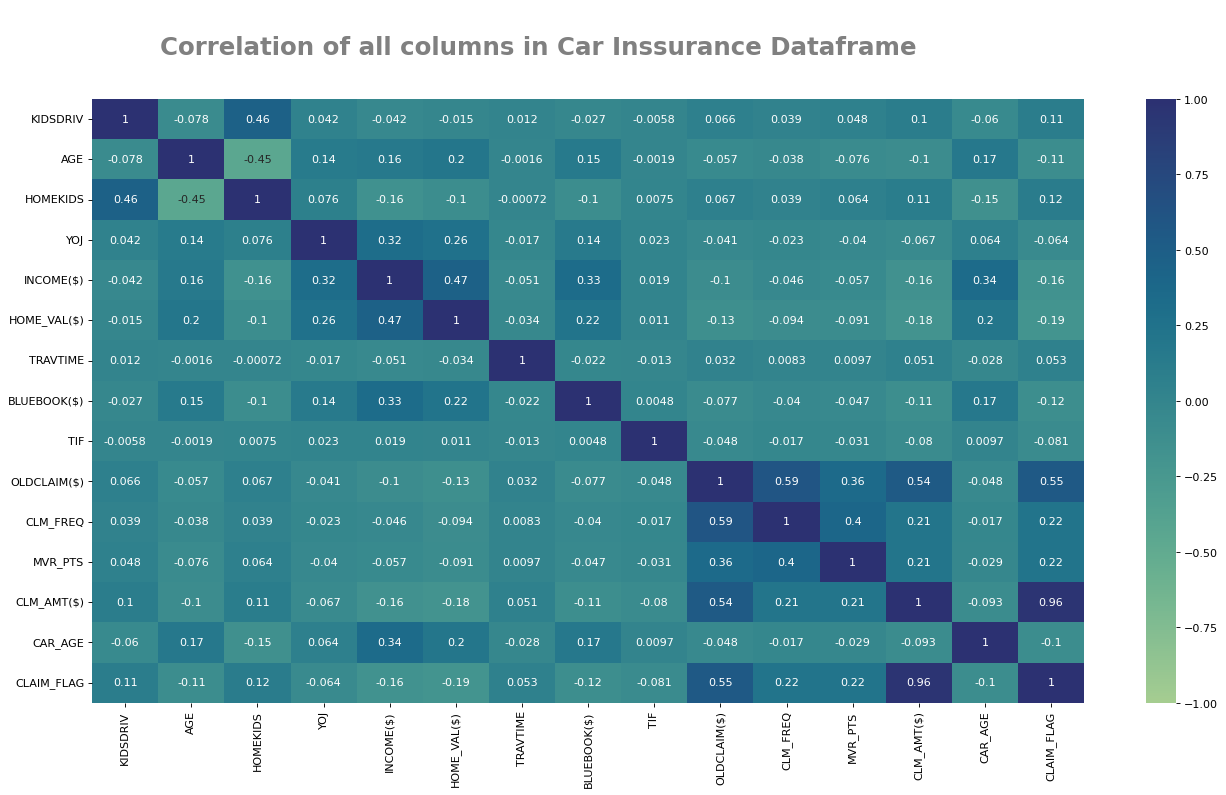

In [30]:
fig, ax = plt.subplots(figsize = (20,10), dpi = 80)

ax=sns.heatmap(CarInssuranceDataframeToImpute[numericData[1:]].corr(), annot=True, cmap='crest');
ax.collections[0].set_clim(-1,1)    
ax.set_title('\nCorrelation of all columns in Car Inssurance Dataframe\n\n\n', size=22, color='GREY', x=0.45, y=0.925, **{'fontname':'DejaVu Sans', 'weight':'bold' })
ax.patch.set_edgecolor('black') 
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> In the given car insurance dataset, the correlation between two variables is visualized using a color-coded graph. A correlation of 0 or near 0 is represented by the color  <span style="font-weight: bold; color:#065465;">green</span>, with the  <span style="font-weight: bold; color:darkblue;"> darkest blue</span> indicating a perfect positive correlation, and the  <span style="font-weight: bold; color:green;"> lightest green</span> representing a perfect negative correlation.
<br>
<br>
When evaluating the correlation between all the features, the <span style="font-weight: bold; color:#122ecc;">corr()</span> method includes the correlation of each feature with itself, which always results in a correlation coefficient of 1. Therefore, the graph always has a darkest blue diagonal line from the upper left to the lower right. Apart from the diagonal, the remaining squares in the graph representing correlations between different features generally exhibit weak or moderately strong relationships.
<br>
<br>      
<span style="font-weight: bold; color:darkred;">Positive Correlation:</span> A positive correlation indicates that as one variable increases, the other variable also tends to increase. In this dataset, variables related to income(<span style="font-weight: bold; color:#122ecc;">INCOME(<span>&#36;</span>)</span>), home value(<span style="font-weight: bold; color:#122ecc;">HOME_VAL(<span>&#36;</span>)</span>), car value (<span style="font-weight: bold; color:#122ecc;">BLUEBOOK(<span>&#36;</span>)</span>), age of customer (<span style="font-weight: bold; color:#122ecc;">AGE</span>), and years in the same job (<span style="font-weight: bold; color:#122ecc;">YOJ</span>) are positively correlated with each other.
<br>
<br>        
        
<span style="font-weight: bold; color:darkred;">Negative Correlation:</span> A negative correlation indicates that as one variable increases, the other variable tends to decrease. For instance, the number of children at home (<span style="font-weight: bold; color:#122ecc;">HOMEKIDS</span>) may be negatively correlated with variables such as (<span style="font-weight: bold; color:#122ecc;">AGE</span>) and (<span style="font-weight: bold; color:#122ecc;">INCOME(<span>&#36;</span>)</span>), suggesting that as the number of children at home increases, the average age and income of individuals may decrease. The number of children at home (<span style="font-weight: bold; color:#122ecc;">HOMEKIDS</span>) is also negatively linked with the age of the car.
<br>
<br> 
<span style="font-weight: bold; color:darkred;">Weak or No Correlation:</span> Some variables may have a weak or no correlation, indicating that changes in one variable do not significantly affect the other variable. Variables such as claim frequency in the past 5 years (<span style="font-weight: bold; color:#122ecc;">CLM_FREQ</span>), the total claimed amount (<span style="font-weight: bold; color:#122ecc;">OLDCLAIM(<span>&#36;</span>)</span>), and the number of Motor Vehicle Records Points (<span style="font-weight: bold; color:#122ecc;">MVR-PTS</span>) are weakly positively correlated with the target amount (<span style="font-weight: bold; color:#122ecc;">TARGET_AMT(<span>&#36;</span>)</span>), which represents the payout in case the car was in a crash. </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/NormalisingAndScaling.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Normalising and scaling (numerical variables)</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Analyze the dataset and perform both normalization and scaling techniques.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/normalising.png" align="left" hspace="25px" vspace="25px" width="130" height="150" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Normalising</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li> Normalisation aims to make observations so that they can be described as <span style="font-weight: bold; color:#122ecc;">normal distribution</span>. A normal distribution, often referred to as a "bell curve", is a statistical distribution characterized by an equal number of observations falling above and below the mean. In a normal distribution, the mean and the median are identical, and there is a greater concentration of observations near the mean. This distribution is also known as a <span style="font-weight: bold; color:#122ecc;">Gaussian distribution</span>.
</ul>

In [31]:
# Select the numeric columns for normalising and scaling numerical values
numericData = CarInssuranceDataframeImputedValues.select_dtypes(include=np.number).columns
# InitialData
InitialData = CarInssuranceDataframeImputedValues[numericData].copy()

In [32]:
def PlotTheNormalisedData(column):
    
    #Get the column from the initial data set
    InitialDataframeColumn = InitialData[column]
    #Get the column from the normalised data set
    normalisedDataFrameColumn = (InitialDataframeColumn - InitialDataframeColumn.mean()) / InitialDataframeColumn.std()
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 2))
    # Plot Graph before Normalising
    sns.distplot(InitialDataframeColumn, ax=ax[0], kde=True, color="darkblue")
    ax[0].set_xlabel("Initial Data", fontsize=12)
    ax[0].set_ylabel("Count", fontsize=12)
    ax[0].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    ax[0].set_facecolor((1, 1, 1))
    ax[0].patch.set_edgecolor('black')

    # Plot Graph after Normalising
    sns.distplot(normalisedDataFrameColumn, ax=ax[1], kde=True, color='darkgreen')
    ax[1].set_xlabel("Normalised Data", fontsize=12)
    ax[1].set_ylabel("Count", fontsize=12)
    ax[1].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    ax[1].set_facecolor((1, 1, 1))
    ax[1].patch.set_edgecolor('black')

    fig.suptitle(column, fontsize=17, color='grey', font='Arial', fontweight='bold')
    plt.show()

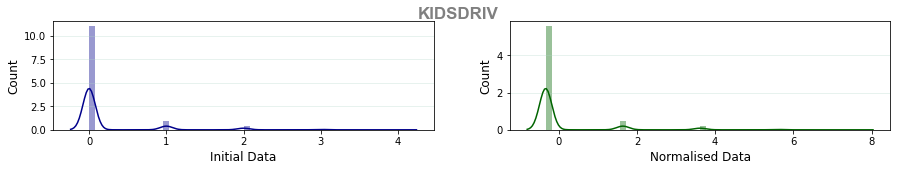

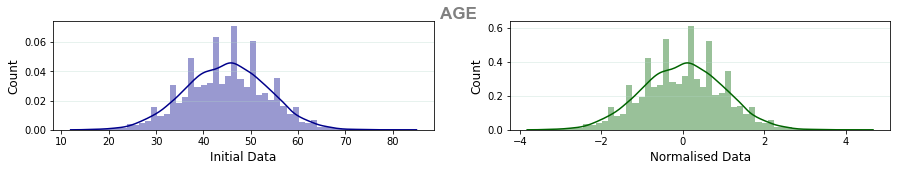

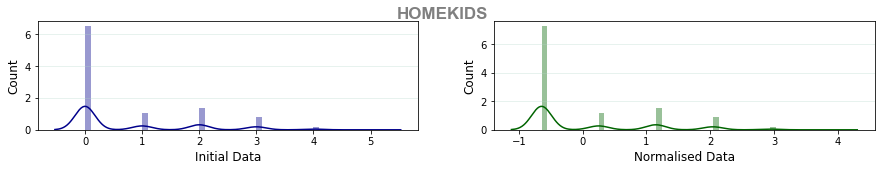

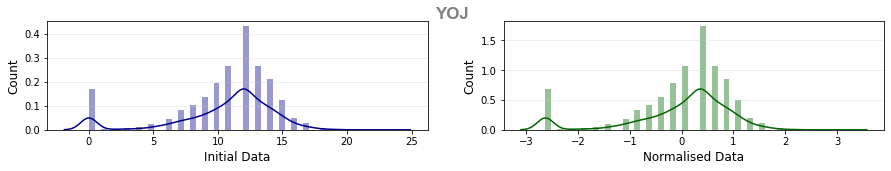

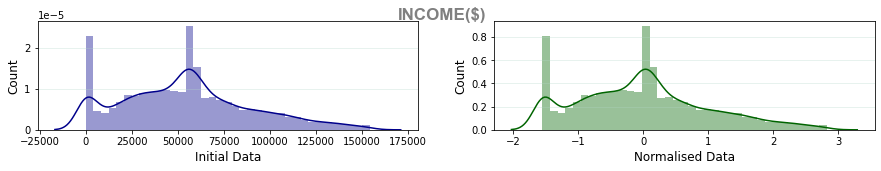

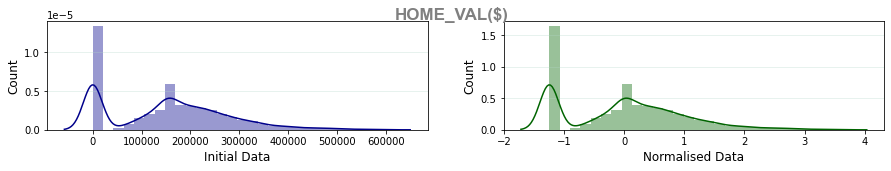

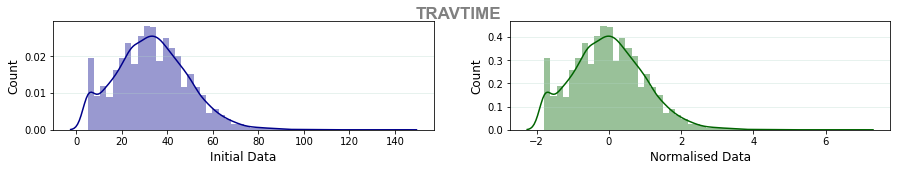

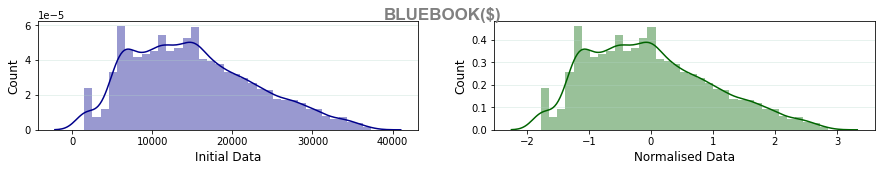

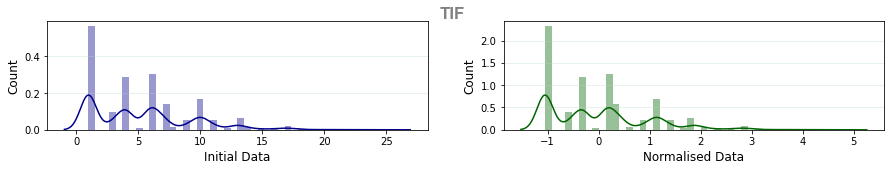

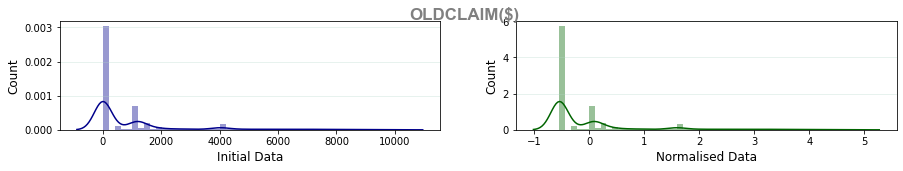

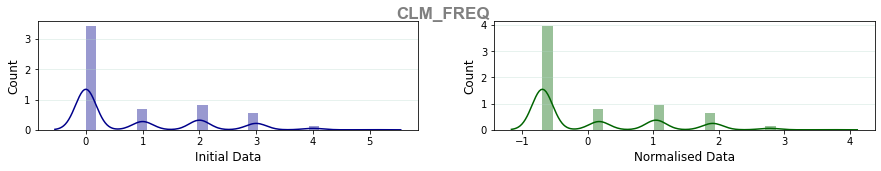

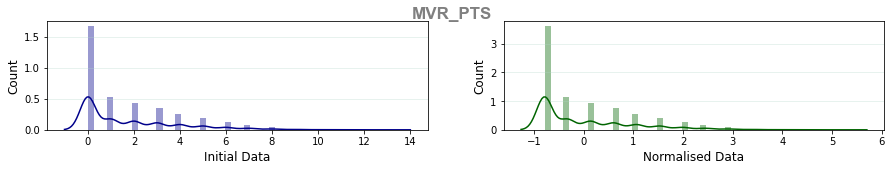

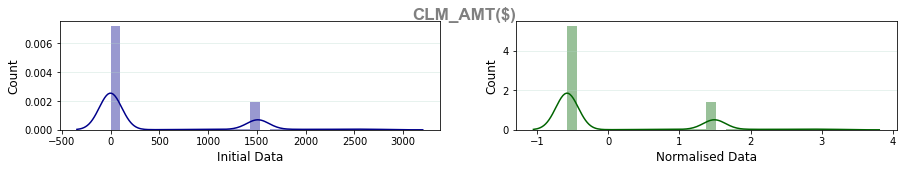

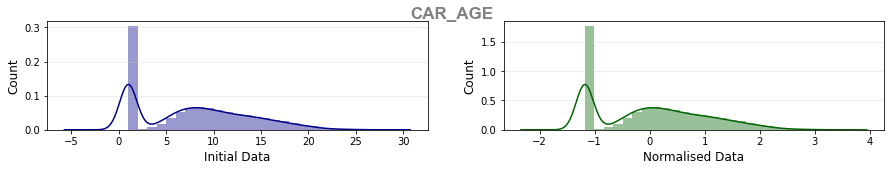

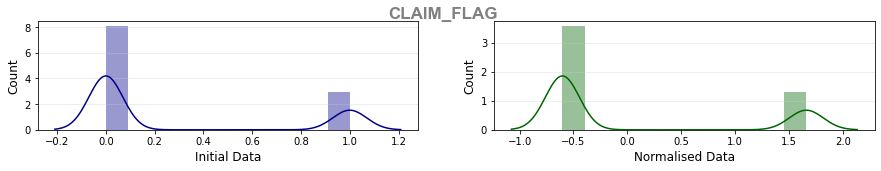

In [33]:
for col in InitialData:
    if col=='ID':
        continue
    else:
        PlotTheNormalisedData(col)

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>During analysis of the car insurance dataset, numeric columns were normalized by using the <span style="font-weight: bold; color:#122ecc;">z-score formula</span>. This normalisation process involves <span style="font-weight: bold; color:#122ecc;">subtracting the mean and dividing by the standard deviation of each data point</span>. It eliminates differences in magnitudes and ranges, enabling fairer comparison and interpretation of the data. Normalization can also changes the original data's shape sometimes.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/scaling.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Scaling</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Scaling is the transformation of data to a<span style="font-weight: bold; color:#122ecc;"> specific scale</span>, like 0-1 or 0-100.</li> 
</ul>

In [34]:
def PlotTheScaledData(column):
    
    # Get the column from Initial Data
    InitialDataColumn = InitialData[column]
    # Get the column from Scaled Data
    ScaledDataColumn = (InitialDataColumn - InitialDataColumn.min()) / (InitialDataColumn.max() - InitialDataColumn.min())

    fig, ax = plt.subplots(1, 2, figsize=(15, 2))

    # Plot Graph before Scaling
    sns.distplot(InitialDataColumn, ax=ax[0], kde=True, bins=5, color="purple")
    ax[0].set_xlabel("Initial Data", fontsize=12)
    ax[0].set_ylabel("Count", fontsize=12)
    ax[0].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    ax[0].set_facecolor((1, 1, 1))
    ax[0].patch.set_edgecolor('black')

    # Plot Graph after Scaling
    sns.distplot(ScaledDataColumn, ax=ax[1], kde=True, bins=5, color='skyblue')
    ax[1].set_xlabel("Scaled Data", fontsize=12)
    ax[1].set_ylabel("Count", fontsize=12)
    ax[1].grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
    ax[1].set_facecolor((1, 1, 1))
    ax[1].patch.set_edgecolor('black')

    fig.suptitle(column, fontsize=17, color='grey', font='Arial', fontweight='bold')
    plt.show()

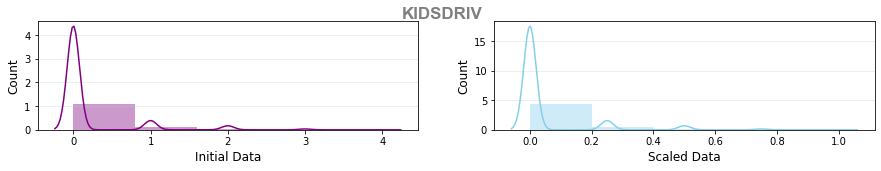

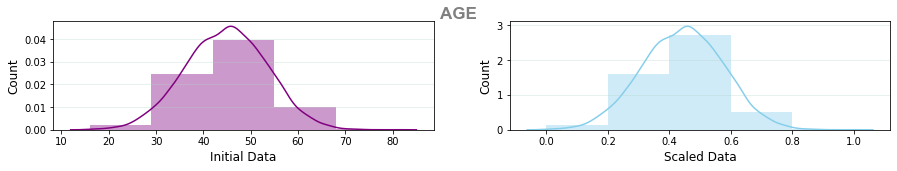

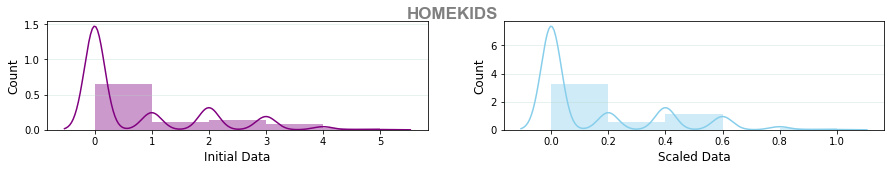

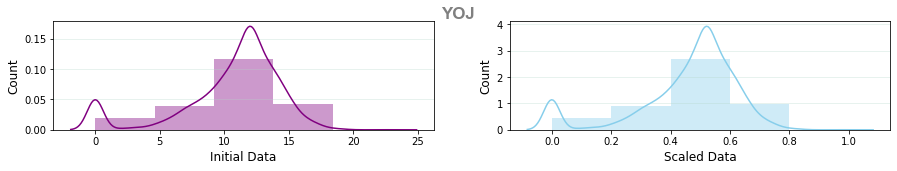

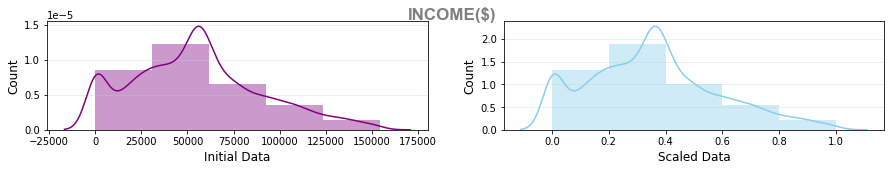

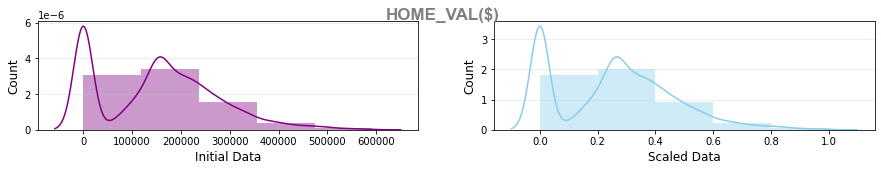

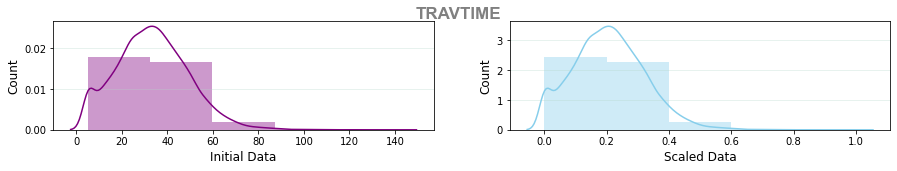

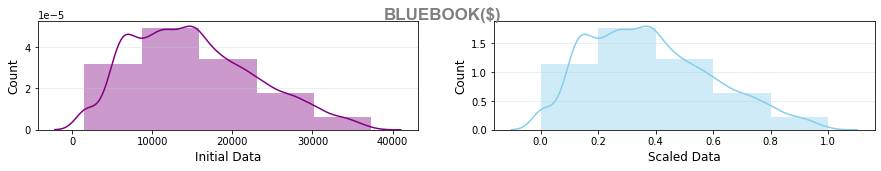

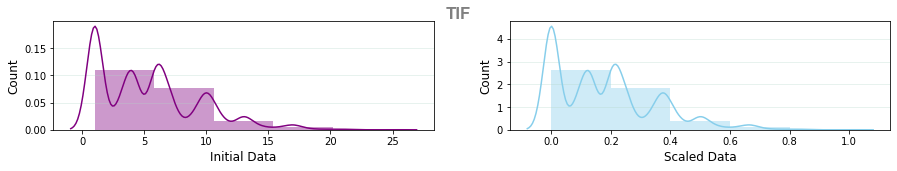

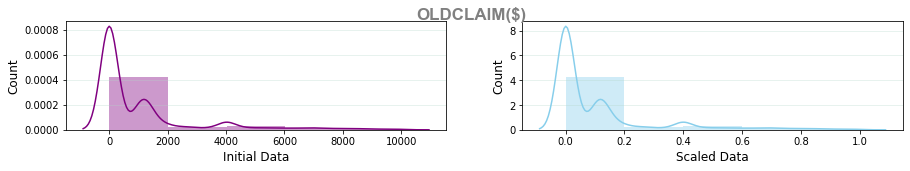

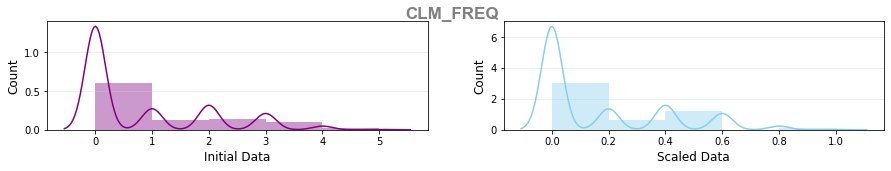

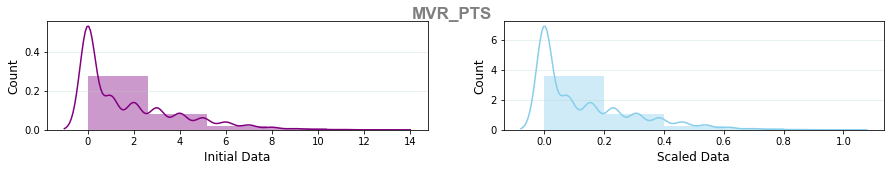

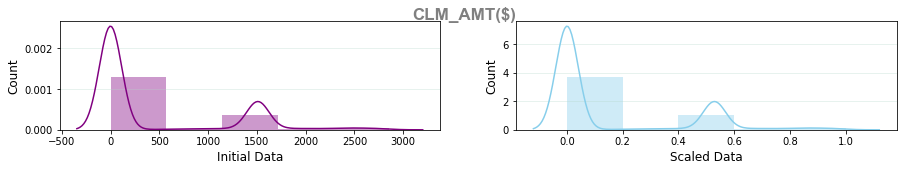

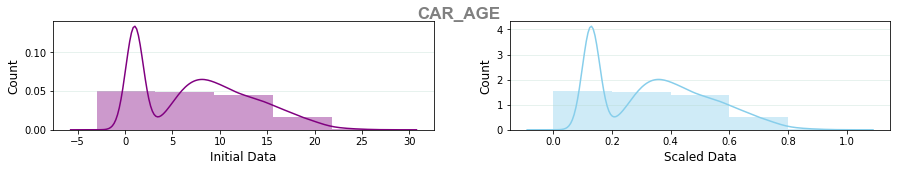

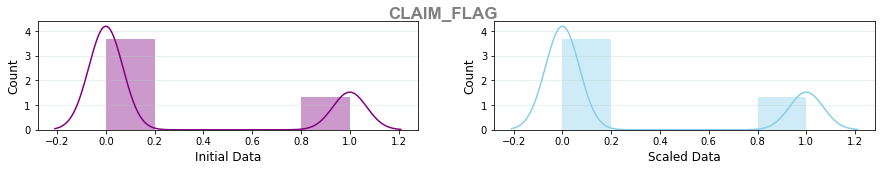

In [35]:
for col in InitialData:
    if col=='ID':
        continue
    else:
        PlotTheScaledData(col)

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The car insurance dataset was analyzed, and the numeric columns were scaled using  <span style="font-weight: bold; color:#122ecc;">Min-Max scaling</span>. This process involved  <span style="font-weight: bold; color:#122ecc;">subtracting each value in the dataset by the minimum value and then dividing it by the difference between the maximum and minimum values of the dataset</span>. This transformation involved mapping the values to a specific range 0-1. Scaling ensures fair comparison by bringing variables to a similar scale while preserving the original distribution's shape.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/grouping.png" align="left" hspace="25px" vspace="20px" width="100" height="80" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Grouping of data</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Analyze the dataset for data grouping.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/age.png" align="left" hspace="25px" vspace="20px" width="130" height="100" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Group by Age</li>
</ul>

In [36]:
GroupByAge = CarInssuranceDataframeImputedValues.groupby(['AGE'])
GroupByAge= GroupByAge.first().sort_values(by='AGE')
GroupByAge.style.background_gradient(cmap='Purples')

,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,CAR_TYPE,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG,URBANICITY
AGE,,,,,,,,,,,,,,,,,,,,,,,,,,
16.000000,587255384,0,1983-07-07 00:00:00,0,12.000000,49522.000000,No,155030.000000,No,M,Bachelors,Blue Collar,24,Commercial,14980.000000,4,Minivan,no,0.000000,0,No,0,1511.266453,1.000000,1,Highly Urban/ Urban
17.000000,587255384,0,1982-07-07 00:00:00,0,6.000000,40015.000000,No,152243.000000,No,M,High School,Blue Collar,50,Commercial,23400.000000,7,Panel Truck,yes,2047.000000,2,No,7,1511.266453,1.000000,1,Highly Urban/ Urban
18.000000,543743935,0,1981-03-16 00:00:00,0,0.000000,0.000000,No,0.000000,Yes,F,High School,Home Maker,52,Private,9970.000000,1,SUV,yes,4033.977868,3,No,7,1511.266453,1.000000,1,Highly Urban/ Urban
19.000000,311416263,0,1980-06-13 00:00:00,0,6.000000,5336.000000,No,0.000000,No,F,High School,Clerical,26,Private,11650.000000,6,Sports Car,yes,1845.000000,2,No,7,1511.266453,1.000000,1,Highly Urban/ Urban
20.000000,805276249,0,1979-03-26 00:00:00,0,8.000000,4209.000000,No,80790.000000,No,F,High School,Clerical,23,Private,10570.000000,1,SUV,no,0.000000,0,No,4,1511.266453,9.000000,1,Highly Urban/ Urban
21.000000,196357678,0,1978-02-06 00:00:00,0,5.000000,40022.000000,No,0.000000,No,F,Bachelors,Manager,67,Private,9360.000000,6,Sports Car,yes,0.000000,0,No,0,1511.266453,1.000000,1,Highly Urban/ Urban
22.000000,220259253,0,1976-12-17 00:00:00,0,10.000000,5442.000000,No,0.000000,Yes,M,Bachelors,Student,46,Commercial,3800.000000,1,Minivan,yes,4033.977868,2,Yes,6,1749.000000,1.000000,1,Highly Urban/ Urban
23.000000,450344267,0,1976-11-12 00:00:00,3,10.000000,27239.000000,Yes,0.000000,No,M,High School,Clerical,53,Private,6520.000000,3,Pickup,yes,0.000000,0,No,5,2804.000000,1.000000,1,Highly Urban/ Urban
24.000000,221782023,0,1975-11-02 00:00:00,1,12.000000,94566.000000,Yes,239142.000000,No,F,Masters,Blue Collar,34,Private,3900.000000,1,SUV,no,0.000000,0,No,2,1511.266453,16.000000,1,Highly Urban/ Urban


In [37]:
# Create subplots for pie charts
df= GroupByAge
fig = make_subplots(
    rows=4, cols=7,
    specs=[[{}, {},{},{},{},{},{}],
           [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},None,{}]], subplot_titles=("KIDSDRIV","BIRTH", "GENDER", "HOMEKIDS", "YOJ" ,"INCOME($)","PARENT1","HOME_VAL($)",
                                                    "MSTATUS", "CAR_TYPE", "EDUCATION" ,"OCCUPATION", "TRAVTIME", "CAR_USE", 'BLUEBOOK($)', 'TIF', 'RED_CAR',
                                                    'OLDCLAIM($)', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT($)','CAR_AGE', 'CLAIM_FLAG', None,'URBANICITY')
)

# Plot the bars
fig.add_trace(go.Scatter(x=df.index, y=df['KIDSDRIV'], mode='lines+markers', hoverinfo="x+y"), 1, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['BIRTH'], mode='lines+markers', hoverinfo="x+y"), 1, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['GENDER'], mode='lines+markers', hoverinfo="x+y"), 1, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['HOMEKIDS'], mode='lines+markers', hoverinfo="x+y"), 1, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['YOJ'], mode='lines+markers', hoverinfo="x+y"), 1, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['INCOME($)'], mode='lines+markers', hoverinfo="x+y"), 1, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['PARENT1'], mode='lines+markers', hoverinfo="x+y"), 1, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['HOME_VAL($)'], mode='lines+markers', hoverinfo="x+y"), 2, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['MSTATUS'], mode='lines+markers', hoverinfo="x+y"), 2, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_TYPE'], mode='lines+markers', hoverinfo="x+y"), 2, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['EDUCATION'], mode='lines+markers', hoverinfo="x+y"), 2, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['OCCUPATION'], mode='lines+markers', hoverinfo="x+y"), 2, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['TRAVTIME'], mode='lines+markers', hoverinfo="x+y"), 2, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_USE'], mode='lines+markers', hoverinfo="x+y"), 2, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['BLUEBOOK($)'], mode='lines+markers', hoverinfo="x+y"), 3, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['TIF'], mode='lines+markers', hoverinfo="x+y"), 3, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['RED_CAR'], mode='lines+markers', hoverinfo="x+y"), 3, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['OLDCLAIM($)'], mode='lines+markers', hoverinfo="x+y"), 3, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_FREQ'], mode='lines+markers', hoverinfo="x+y"), 3, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['REVOKED'], mode='lines+markers', hoverinfo="x+y"), 3, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['MVR_PTS'], mode='lines+markers', hoverinfo="x+y"), 3, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_AMT($)'], mode='lines+markers', hoverinfo="x+y"), 4, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_AGE'], mode='lines+markers', hoverinfo="x+y"), 4, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CLAIM_FLAG'], mode='lines+markers', hoverinfo="x+y"), 4, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['URBANICITY'], mode='lines+markers', hoverinfo="x+y"), 4, 5)

fig.update_layout(bargap=0.03, height=900, width=2900, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="Analysis by Age", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0,'xanchor': 'left','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Grouping the dataset by age and analyzing it reveals patterns and trends within each age slot.<br><br>

<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Age Slot: 16-20 years</li>
-Young and inexperienced drivers with low incomes and diverse educational backgrounds.<br>
-Varied car types, including minivans and sports cars.<br>
-Some instances of car accidents and revoked licenses.<br><br>
        
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Age Slot: 21-30 years</li>
-Young adults with some driving experience and higher incomes.<br>
-Education levels range from high school graduates to master's degrees.<br>
-Occupations include clerical, blue-collar, managerial, and professional roles.<br>
-Relatively low claim frequency.<br><br>
    
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Age Slot: 31-40 years</li>
-Individuals with more driving experience and higher incomes.<br>
-Education levels include high school graduates, bachelor's degrees, and some with master's degrees.<br>
-Occupations cover a wide range, including blue-collar, managerial, and lawyer professions.<br>
-Various car types, including minivans, sports cars, and pickups.<br>
-Relatively low claim frequency.<br><br>

<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Age Slot: 41-50 years</li>
-Individuals with significant driving experience and higher incomes.<br>
-Education levels range from high school graduates to master's degrees.<br>
-Occupations include blue-collar, managerial, lawyer, and home maker roles.<br>
-Car types range from SUVs to minivans.<br>
-Relatively low claim frequency.<br><br>
        
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Age Slot: 50+ years</li>
-Individuals with extensive driving experience and more stable incomes.<br>
-Education levels vary, with high school graduates being the most common.<br>
-Occupations include blue-collar, lawyer, home maker, and retiree roles.<br>
-Diverse car types, including SUVs, pickups, and minivans.<br>
-Relatively low instances of accidents and revoked licenses.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/gender.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Group by Gender</li>
</ul>

In [38]:
GroupByGender = CarInssuranceDataframeImputedValues.groupby(['GENDER'])
GroupByGender = GroupByGender.first()
GroupByGender.style.background_gradient(cmap='Greens')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,CAR_TYPE,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG,URBANICITY
GENDER,,,,,,,,,,,,,,,,,,,,,,,,,,
F,871024631,0,1965-05-05 00:00:00,34.000000,1,12.000000,125301.000000,Yes,0.000000,No,Bachelors,Blue Collar,46,Commercial,17430.000000,1,Sports Car,no,0.000000,0,No,0,1511.266453,7.000000,1,Highly Urban/ Urban
M,7945239,1,1959-09-17 00:00:00,40.000000,1,11.000000,50815.000000,Yes,0.000000,No,High School,Manager,21,Private,18930.000000,6,Minivan,no,3295.000000,1,No,2,1511.266453,1.000000,1,Highly Urban/ Urban


In [39]:
# Create subplots for pie charts
df= GroupByGender
fig = make_subplots(
    rows=4, cols=7,
    specs=[[{}, {},{},{},{},{},{}],
           [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},None,{}]], subplot_titles=("KIDSDRIV","BIRTH", "AGE", "HOMEKIDS", "YOJ" ,"INCOME($)","PARENT1","HOME_VAL($)",
                                                    "MSTATUS", "CAR_TYPE", "EDUCATION" ,"OCCUPATION", "TRAVTIME", "CAR_USE", 'BLUEBOOK($)', 'TIF', 'RED_CAR',
                                                    'OLDCLAIM($)', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT($)','CAR_AGE', 'CLAIM_FLAG', None,'URBANICITY')
)

# Plot the bars
fig.add_trace(go.Scatter(x=df.index, y=df['KIDSDRIV'], mode='lines+markers', hoverinfo="x+y"), 1, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['BIRTH'], mode='lines+markers', hoverinfo="x+y"), 1, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['AGE'], mode='lines+markers', hoverinfo="x+y"), 1, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['HOMEKIDS'], mode='lines+markers', hoverinfo="x+y"), 1, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['YOJ'], mode='lines+markers', hoverinfo="x+y"), 1, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['INCOME($)'], mode='lines+markers', hoverinfo="x+y"), 1, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['PARENT1'], mode='lines+markers', hoverinfo="x+y"), 1, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['HOME_VAL($)'], mode='lines+markers', hoverinfo="x+y"), 2, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['MSTATUS'], mode='lines+markers', hoverinfo="x+y"), 2, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_TYPE'], mode='lines+markers', hoverinfo="x+y"), 2, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['EDUCATION'], mode='lines+markers', hoverinfo="x+y"), 2, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['OCCUPATION'], mode='lines+markers', hoverinfo="x+y"), 2, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['TRAVTIME'], mode='lines+markers', hoverinfo="x+y"), 2, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_USE'], mode='lines+markers', hoverinfo="x+y"), 2, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['BLUEBOOK($)'], mode='lines+markers', hoverinfo="x+y"), 3, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['TIF'], mode='lines+markers', hoverinfo="x+y"), 3, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['RED_CAR'], mode='lines+markers', hoverinfo="x+y"), 3, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['OLDCLAIM($)'], mode='lines+markers', hoverinfo="x+y"), 3, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_FREQ'], mode='lines+markers', hoverinfo="x+y"), 3, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['REVOKED'], mode='lines+markers', hoverinfo="x+y"), 3, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['MVR_PTS'], mode='lines+markers', hoverinfo="x+y"), 3, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_AMT($)'], mode='lines+markers', hoverinfo="x+y"), 4, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_AGE'], mode='lines+markers', hoverinfo="x+y"), 4, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CLAIM_FLAG'], mode='lines+markers', hoverinfo="x+y"), 4, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['URBANICITY'], mode='lines+markers', hoverinfo="x+y"), 4, 5)

fig.update_layout(bargap=0.03, height=900, width=2900, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="Analysis by Gender", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0,'xanchor': 'left','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Grouping the dataset by gender and analyzing it reveals patterns and trends within each age slot.<br><br>
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Female:</li>
Most of the females in the dataset are around 34 years old. They have an average income of <span>&#36;</span>125,301, which is higher than that of males. Females in the dataset predominantly use their cars for commercial purposes, own sports cars, and tend to have a low frequency of insurance claims. The average claim amount for females is <span>&#36;</span>1,511.27. They mostly reside in highly urban/urban areas.
<br>       
<br>
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Male:</li>
Most of the males in the dataset are around 40 years old, with one driving child. They have an average income of <span>&#36;</span>50,815 and 11 years of employment. Most are single parents, high school educated, and work as managers. They use cars for private purposes, mainly owning minivans. They have previous claims with an average amount of <span>&#36;</span>3,295 and 2 motor vehicle record points. They reside in highly urban/urban areas, similar to females.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/genderMaritalStatusSingleParent.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Group by Gender, Marital Status and Single Parent</li>
</ul>

In [40]:
GroupByGenderMSTATUSPARENT1 = CarInssuranceDataframeImputedValues.groupby(['GENDER', 'MSTATUS','PARENT1'])
GroupByGenderMSTATUSPARENT1= GroupByGenderMSTATUSPARENT1.first()
GroupByGenderMSTATUSPARENT1.style.background_gradient(cmap='Reds')

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/vehicleType.png" align="left" hspace="25px" vspace="5px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Group by Vehicle Type</li>
</ul>

In [41]:
GroupByVehicleType = CarInssuranceDataframeImputedValues.groupby(['CAR_TYPE'])
GroupByVehicleType = GroupByVehicleType.first()
GroupByVehicleType.style.background_gradient(cmap='RdPu')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG,URBANICITY
CAR_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,
Minivan,7945239,1,1959-09-17 00:00:00,40.000000,1,11.000000,50815.000000,Yes,0.000000,No,M,High School,Manager,21,Private,18930.000000,6,no,3295.000000,1,No,2,1511.266453,1.000000,1,Highly Urban/ Urban
Panel Truck,665591504,0,1946-07-19 00:00:00,53.000000,0,11.000000,44887.157212,No,0.000000,No,M,PhD,Blue Collar,64,Commercial,28340.000000,6,yes,0.000000,0,No,3,1267.000000,10.000000,1,Highly Urban/ Urban
Pickup,885280620,0,1959-04-26 00:00:00,40.000000,0,11.000000,16989.000000,No,0.000000,No,M,High School,Blue Collar,20,Commercial,12230.000000,4,yes,4033.977868,1,Yes,13,1511.266453,6.000000,1,Highly Urban/ Urban
SUV,77382913,0,1964-11-22 00:00:00,34.000000,0,10.000000,62978.000000,No,0.000000,No,F,Bachelors,Clerical,34,Private,11200.000000,1,no,0.000000,0,No,0,2501.000000,1.000000,1,Highly Urban/ Urban
Sports Car,871024631,0,1965-05-05 00:00:00,34.000000,1,12.000000,125301.000000,Yes,0.000000,No,F,Bachelors,Blue Collar,46,Commercial,17430.000000,1,no,0.000000,0,No,0,1511.266453,7.000000,1,Highly Urban/ Urban
Van,892208080,1,1961-12-14 00:00:00,37.000000,2,12.000000,107961.000000,No,333680.000000,Yes,M,Bachelors,Blue Collar,44,Commercial,16970.000000,1,yes,2374.000000,1,Yes,10,1511.266453,7.000000,1,Highly Urban/ Urban


In [42]:
# Create subplots for pie charts
df= GroupByVehicleType
fig = make_subplots(
    rows=4, cols=7,
    specs=[[{}, {},{},{},{},{},{}],
           [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},None,{}]], subplot_titles=("KIDSDRIV","BIRTH", "AGE", "HOMEKIDS", "YOJ" ,"INCOME($)","PARENT1","HOME_VAL($)",
                                                    "MSTATUS", "GENDER", "EDUCATION" ,"OCCUPATION", "TRAVTIME", "CAR_USE", 'BLUEBOOK($)', 'TIF', 'RED_CAR',
                                                    'OLDCLAIM($)', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT($)','CAR_AGE', 'CLAIM_FLAG', None,'URBANICITY')
)

# Plot the bars
fig.add_trace(go.Scatter(x=df.index, y=df['KIDSDRIV'], mode='lines+markers', hoverinfo="x+y"), 1, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['BIRTH'], mode='lines+markers', hoverinfo="x+y"), 1, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['AGE'], mode='lines+markers', hoverinfo="x+y"), 1, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['HOMEKIDS'], mode='lines+markers', hoverinfo="x+y"), 1, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['YOJ'], mode='lines+markers', hoverinfo="x+y"), 1, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['INCOME($)'], mode='lines+markers', hoverinfo="x+y"), 1, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['PARENT1'], mode='lines+markers', hoverinfo="x+y"), 1, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['HOME_VAL($)'], mode='lines+markers', hoverinfo="x+y"), 2, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['MSTATUS'], mode='lines+markers', hoverinfo="x+y"), 2, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['GENDER'], mode='lines+markers', hoverinfo="x+y"), 2, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['EDUCATION'], mode='lines+markers', hoverinfo="x+y"), 2, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['OCCUPATION'], mode='lines+markers', hoverinfo="x+y"), 2, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['TRAVTIME'], mode='lines+markers', hoverinfo="x+y"), 2, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_USE'], mode='lines+markers', hoverinfo="x+y"), 2, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['BLUEBOOK($)'], mode='lines+markers', hoverinfo="x+y"), 3, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['TIF'], mode='lines+markers', hoverinfo="x+y"), 3, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['RED_CAR'], mode='lines+markers', hoverinfo="x+y"), 3, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['OLDCLAIM($)'], mode='lines+markers', hoverinfo="x+y"), 3, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_FREQ'], mode='lines+markers', hoverinfo="x+y"), 3, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['REVOKED'], mode='lines+markers', hoverinfo="x+y"), 3, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['MVR_PTS'], mode='lines+markers', hoverinfo="x+y"), 3, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_AMT($)'], mode='lines+markers', hoverinfo="x+y"), 4, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_AGE'], mode='lines+markers', hoverinfo="x+y"), 4, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CLAIM_FLAG'], mode='lines+markers', hoverinfo="x+y"), 4, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['URBANICITY'], mode='lines+markers', hoverinfo="x+y"), 4, 5)

fig.update_layout(bargap=0.03, height=900, width=2900, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="Analysis by Vehicle Type", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0,'xanchor': 'left','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Grouping the dataset by type of vehicle and analyzing it reveals patterns and trends within each age slot.<br><br>
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Minivan:</li>
The customers who own a minivan are mostly male and most of them have one child who drives. They are around 40 years old on average. The majority of them have completed high school education and work as managers. They primarily use the minivan for private purposes. The average bluebook value of the minivans owned by these customers is <span>&#36;</span>18,930, and most of them are 1 year old.The majority of minivans owned by these customers are not red cars. The majority of them do not have any previous claims. These customers who own minivans mostly reside in highly urban/urban areas.<br><br> 
        
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Panel Truck:</li>
Customers who own a panel truck are primarily male and most of them do not have any driving children. They are typically around 53 years old. Most of them hold a PhD degree and work in blue-collar occupations. They use the panel truck for commercial purposes and have an average bluebook value of $28,340. Most of panel trucks are red car. The majority of them do not have any previous claims. These customers who own panel truck mostly reside in highly urban/urban areas.<br><br>
    
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Pickup:</li>
Customers who own a pickup are primarily male and most of them do not have any driving children. They are typically around 40 years old. Most of them have completed high school education and work in blue-collar occupations. They use the pickup truck for commercial purposes and have an average bluebook value of <span>&#36;</span>12,230. Most of the pickup are red car. They have mostly been assigned 6 MVR points and the average age of their pickup trucks is 6 years. They have made previous claims with an average claim amount of <span>&#36;</span>4,033.98. They reside in highly urban/urban areas.<br><br>

<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">SUV:</li>
Customers who own an SUV are primarily female and most of them do not have any driving children. They are typically around 34 years old. Most of them have completed a bachelor's degree and work in clerical occupations. They use the SUV for private purposes and have an average bluebook value of <span>&#36;</span>11,200. The majority of SUVs owned by these customers are not red cars. Most of them have not made any previous claims, and the average age of their SUVs is 1 year. They reside in highly urban/urban areas.<br><br>
   
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Sports car:</li>
Customers who own a sports car are primarily female and most of them do not have any driving children. They are typically around 34 years old. Most of them have completed a bachelor's degree and work in blue-collar occupations. They use the sports car for commercial purposes and have an average bluebook value of <span>&#36;</span>17,430. The majority of sports cars owned by these customers are not red. Most of them have not made any previous claims, and the average age of their sports cars is 7 years. They reside in highly urban/urban areas.<br><br>

<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Van:</li>
Customers who own a van are primarily male and most of them have one child who drives. They are typically around 37 years old. Most of them have completed a bachelor's degree and work in blue-collar occupations. They use the van for commercial purposes and have an average bluebook value of <span>&#36;</span>16,970. The majority of vans owned by these customers are not red. Most of them have made one previous claim, with an average claim amount of <span>&#36;</span>2,374. The average age of their vans is 7 years. They reside in highly urban/urban areas.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/DrivingRecord.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Grouping by Driving Record</li>
</ul>

In [43]:
GroupByDrivingRecord = CarInssuranceDataframeImputedValues.groupby(['MVR_PTS', 'REVOKED'])
GroupByDrivingRecord = GroupByDrivingRecord.first()
GroupByDrivingRecord.style.background_gradient(cmap='Blues')

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/MVR_PTS.png" align="left" hspace="25px" vspace="0px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Grouping by Motor Vehile Record Points</li>
</ul>

In [44]:
GroupByMVRPTS = CarInssuranceDataframeImputedValues.groupby(['MVR_PTS'])
GroupByMVRPTS = GroupByMVRPTS.first()
GroupByMVRPTS.style.background_gradient(cmap='flare')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,CAR_TYPE,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,CLM_AMT($),CAR_AGE,CLAIM_FLAG,URBANICITY
MVR_PTS,,,,,,,,,,,,,,,,,,,,,,,,,,
0,871024631,0,1965-05-05 00:00:00,34.000000,1,12.000000,125301.000000,Yes,0.000000,No,F,Bachelors,Blue Collar,46,Commercial,17430.000000,1,Sports Car,no,0.000000,0,No,1511.266453,7.000000,1,Highly Urban/ Urban
1,800426023,0,1954-12-02 00:00:00,44.000000,2,15.000000,16352.000000,No,134164.000000,Yes,F,High School,Home Maker,37,Private,10520.000000,1,SUV,no,7838.000000,1,No,1511.266453,1.000000,1,Highly Urban/ Urban
2,7945239,1,1959-09-17 00:00:00,40.000000,1,11.000000,50815.000000,Yes,0.000000,No,M,High School,Manager,21,Private,18930.000000,6,Minivan,no,3295.000000,1,No,1511.266453,1.000000,1,Highly Urban/ Urban
3,665591504,0,1946-07-19 00:00:00,53.000000,0,11.000000,44887.157212,No,0.000000,No,M,PhD,Blue Collar,64,Commercial,28340.000000,6,Panel Truck,yes,0.000000,0,No,1267.000000,10.000000,1,Highly Urban/ Urban
4,162166370,0,1940-04-19 00:00:00,59.000000,0,12.000000,87460.000000,No,0.000000,No,M,High School,Manager,45,Private,15420.000000,1,Minivan,yes,4033.977868,2,No,1511.266453,1.000000,1,Highly Urban/ Urban
5,756785495,0,1945-05-15 00:00:00,54.000000,0,12.000000,33212.000000,No,158432.000000,Yes,M,High School,Blue Collar,27,Commercial,24000.000000,4,Panel Truck,no,0.000000,0,No,1511.266453,1.000000,1,Highly Urban/ Urban
6,950995873,0,1953-04-30 00:00:00,46.000000,0,7.000000,54813.321473,No,153200.526346,No,M,Masters,Blue Collar,17,Commercial,23350.000000,13,Panel Truck,yes,4678.000000,3,No,1511.266453,17.000000,1,Highly Urban/ Urban
7,50629045,1,1954-12-29 00:00:00,44.000000,2,15.000000,46140.000000,No,169084.000000,Yes,M,High School,Blue Collar,29,Commercial,10510.000000,1,Pickup,no,4276.000000,3,No,1511.266453,1.000000,1,Highly Urban/ Urban
8,752931241,0,1955-08-21 00:00:00,44.000000,0,8.000000,32317.000000,No,0.000000,No,M,High School,Clerical,68,Private,22450.000000,7,Minivan,yes,3738.000000,1,No,1511.266453,1.000000,1,Highly Urban/ Urban


In [45]:
# Create subplots for pie charts
df= GroupByMVRPTS
fig = make_subplots(
    rows=4, cols=7,
    specs=[[{}, {},{},{},{},{},{}],
           [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},None,{}]], subplot_titles=("KIDSDRIV","BIRTH", "AGE", "HOMEKIDS", "YOJ" ,"INCOME($)","PARENT1","HOME_VAL($)",
                                                    "MSTATUS", "CAR_TYPE", "EDUCATION" ,"OCCUPATION", "TRAVTIME", "CAR_USE", 'BLUEBOOK($)', 'TIF', 'RED_CAR',
                                                    'OLDCLAIM($)', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT($)','CAR_AGE', 'CLAIM_FLAG', None,'URBANICITY')
)

# Plot the bars
fig.add_trace(go.Scatter(x=df.index, y=df['KIDSDRIV'], mode='lines+markers', hoverinfo="x+y"), 1, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['BIRTH'], mode='lines+markers', hoverinfo="x+y"), 1, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['AGE'], mode='lines+markers', hoverinfo="x+y"), 1, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['HOMEKIDS'], mode='lines+markers', hoverinfo="x+y"), 1, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['YOJ'], mode='lines+markers', hoverinfo="x+y"), 1, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['INCOME($)'], mode='lines+markers', hoverinfo="x+y"), 1, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['PARENT1'], mode='lines+markers', hoverinfo="x+y"), 1, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['HOME_VAL($)'], mode='lines+markers', hoverinfo="x+y"), 2, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['MSTATUS'], mode='lines+markers', hoverinfo="x+y"), 2, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['GENDER'], mode='lines+markers', hoverinfo="x+y"), 2, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['EDUCATION'], mode='lines+markers', hoverinfo="x+y"), 2, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['OCCUPATION'], mode='lines+markers', hoverinfo="x+y"), 2, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['TRAVTIME'], mode='lines+markers', hoverinfo="x+y"), 2, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_USE'], mode='lines+markers', hoverinfo="x+y"), 2, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['BLUEBOOK($)'], mode='lines+markers', hoverinfo="x+y"), 3, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['TIF'], mode='lines+markers', hoverinfo="x+y"), 3, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['RED_CAR'], mode='lines+markers', hoverinfo="x+y"), 3, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['OLDCLAIM($)'], mode='lines+markers', hoverinfo="x+y"), 3, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_FREQ'], mode='lines+markers', hoverinfo="x+y"), 3, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['REVOKED'], mode='lines+markers', hoverinfo="x+y"), 3, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_TYPE'], mode='lines+markers', hoverinfo="x+y"), 3, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_AMT($)'], mode='lines+markers', hoverinfo="x+y"), 4, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_AGE'], mode='lines+markers', hoverinfo="x+y"), 4, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CLAIM_FLAG'], mode='lines+markers', hoverinfo="x+y"), 4, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['URBANICITY'], mode='lines+markers', hoverinfo="x+y"), 4, 5)

fig.update_layout(bargap=0.03, height=900, width=2900, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="Analysis by Motor Vehile Record Points", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0,'xanchor': 'left','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Grouping the dataset by Motor Vehile Record Points and analyzing it reveals patterns and trends within each age slot.<br><br>
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">MVR_PTS:0-5</li>
The majority of customers are around 34 years old and predominantly male. Most of them do not have any driving children and work in blue-collar occupations. These customers primarily use their panel trucks for commercial purposes, and the average bluebook value of their vehicles is <span>&#36;</span>17,430. Additionally, most of the panel trucks owned by these customers are considered red cars. Interestingly, none of the customers in this slot have made any previous claims. The average age of their panel trucks is 1 year, indicating that they own relatively new vehicles. These customers reside in highly urban or urban areas.<br><br> 
        
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">MVR_PTS:5-10</li>
The majority of customers are around 54 years old, with a relatively equal distribution between males and females. Similar to the previous slot, most of them do not have any driving children and work in blue-collar occupations. They primarily use their panel trucks for commercial purposes, and the average bluebook value of their vehicles varies within this range. When it comes to the color of their panel trucks, it is not predominantly red or any other specific color. Unlike the previous slot, some customers in this range have made previous claims, with varying claim frequencies. The average age of their panel trucks is 1 year, suggesting a similar trend of owning relatively new vehicles. These customers also reside in highly urban or urban areas.<br><br>
    
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">MVR_PTS:10-13</li>
The majority of customers fall within the age range of 33 to 40 years old. The customers in this range are primarily male. Similar to the previous slots, most of them do not have any driving children and work in blue-collar occupations. They utilize their panel trucks for commercial purposes, and the average bluebook value of their vehicles is around <span>&#36;</span>15,000. When it comes to the color of their panel trucks, it varies between red and other colors. Some customers in this slot have made previous claims, with different claim frequencies. The average age of their panel trucks is around 1 to 7 years, indicating a mix of new and slightly older vehicles. Like the other slots, these customers also reside in highly urban or urban areas.<br><br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/location.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Grouping by Location</li>
</ul>

In [46]:
GroupByLocation = CarInssuranceDataframeImputedValues.groupby(['URBANICITY'])
GroupByLocation = GroupByLocation.first()
GroupByLocation.style.background_gradient(cmap='flare')

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME($),PARENT1,HOME_VAL($),MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK($),TIF,CAR_TYPE,RED_CAR,OLDCLAIM($),CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT($),CAR_AGE,CLAIM_FLAG
URBANICITY,,,,,,,,,,,,,,,,,,,,,,,,,,
Highly Rural/ Rural,224701093,0,1965-04-16 00:00:00,34.000000,3,12.000000,22510.000000,No,123888.000000,Yes,M,High School,Clerical,26,Private,14690.000000,4,Minivan,yes,0.000000,0,Yes,0,1230.000000,1.000000,1
Highly Urban/ Urban,871024631,0,1965-05-05 00:00:00,34.000000,1,12.000000,125301.000000,Yes,0.000000,No,F,Bachelors,Blue Collar,46,Commercial,17430.000000,1,Sports Car,no,0.000000,0,No,0,1511.266453,7.000000,1


In [47]:
# Create subplots for pie charts
df= GroupByLocation
fig = make_subplots(
    rows=4, cols=7,
    specs=[[{}, {},{},{},{},{},{}],
           [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}],
          [{}, {},{},{},{},{},{}]], subplot_titles=("KIDSDRIV","BIRTH", "AGE", "HOMEKIDS", "YOJ" ,"INCOME($)","PARENT1","HOME_VAL($)",
                                                    "MSTATUS", "CAR_TYPE", "EDUCATION" ,"OCCUPATION", "TRAVTIME", "CAR_USE", 'BLUEBOOK($)', 'TIF', 'RED_CAR',
                                                    'OLDCLAIM($)', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT($)','CAR_AGE', 'CLAIM_FLAG', 'MVR_PTS')
)

# Plot the bars
fig.add_trace(go.Scatter(x=df.index, y=df['KIDSDRIV'], mode='lines+markers', hoverinfo="x+y"), 1, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['BIRTH'], mode='lines+markers', hoverinfo="x+y"), 1, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['AGE'], mode='lines+markers', hoverinfo="x+y"), 1, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['HOMEKIDS'], mode='lines+markers', hoverinfo="x+y"), 1, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['YOJ'], mode='lines+markers', hoverinfo="x+y"), 1, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['INCOME($)'], mode='lines+markers', hoverinfo="x+y"), 1, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['PARENT1'], mode='lines+markers', hoverinfo="x+y"), 1, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['HOME_VAL($)'], mode='lines+markers', hoverinfo="x+y"), 2, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['MSTATUS'], mode='lines+markers', hoverinfo="x+y"), 2, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['GENDER'], mode='lines+markers', hoverinfo="x+y"), 2, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['EDUCATION'], mode='lines+markers', hoverinfo="x+y"), 2, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['OCCUPATION'], mode='lines+markers', hoverinfo="x+y"), 2, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['TRAVTIME'], mode='lines+markers', hoverinfo="x+y"), 2, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_USE'], mode='lines+markers', hoverinfo="x+y"), 2, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['BLUEBOOK($)'], mode='lines+markers', hoverinfo="x+y"), 3, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['TIF'], mode='lines+markers', hoverinfo="x+y"), 3, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['RED_CAR'], mode='lines+markers', hoverinfo="x+y"), 3, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['OLDCLAIM($)'], mode='lines+markers', hoverinfo="x+y"), 3, 4)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_FREQ'], mode='lines+markers', hoverinfo="x+y"), 3, 5)
fig.add_trace(go.Scatter(x=df.index, y=df['REVOKED'], mode='lines+markers', hoverinfo="x+y"), 3, 6)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_TYPE'], mode='lines+markers', hoverinfo="x+y"), 3, 7)
fig.add_trace(go.Scatter(x=df.index, y=df['CLM_AMT($)'], mode='lines+markers', hoverinfo="x+y"), 4, 1)
fig.add_trace(go.Scatter(x=df.index, y=df['CAR_AGE'], mode='lines+markers', hoverinfo="x+y"), 4, 2)
fig.add_trace(go.Scatter(x=df.index, y=df['CLAIM_FLAG'], mode='lines+markers', hoverinfo="x+y"), 4, 3)
fig.add_trace(go.Scatter(x=df.index, y=df['MVR_PTS'], mode='lines+markers', hoverinfo="x+y"), 4, 4)

fig.update_layout(bargap=0.03, height=900, width=3500, coloraxis=dict(colorscale='Plasma'), showlegend=False, title_text="Analysis by Location", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0,'xanchor': 'left','yanchor': 'top'})

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> Grouping the dataset by type of location and analyzing it reveals patterns and trends within each age slot.<br><br>
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Highly Rural/ Rural</li>
The majority of customers are 34-year-old individuals with no driving children. They have three children at home on average and 12 years of job experience. Their average income is around <span>&#36;</span>22,510, and their home value is approximately <span>&#36;</span>123,888. Most of them are married males with a high school education. They work in clerical occupations and have a travel time of 26 minutes. These customers primarily use their panel trucks for private purposes, with an average bluebook value of <span>&#36;</span>14,690. The majority of panel trucks owned by these customers are minivans and considered red cars. Interestingly, they have not made any previous claims, and their panel trucks have an average age of 1 year. There is a claim present with an average claim amount of <span>&#36;</span>1,230, and the claim flag is set to 1.<br><br> 
        
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:17px;color:blue">Highly Urban/ Urban</li>
The majority of customers are 34-year-old individuals without driving children. They have, on average, 1 child at home, 12 years of job experience, and an annual income of <span>&#36;</span>125,301. Most of them have a home value of <span>&#36;</span>0 and are not single parents. They are predominantly single and female, with a bachelor's degree. In terms of occupation, most of them work in blue-collar jobs and have a travel time of 46 minutes. They primarily use their panel trucks for commercial purposes, with an average value of <span>&#36;</span>17,430. These panel trucks are sports cars and not red in color. Most of the customers have no previous claims or claim frequency, and their licenses have not been revoked. However, they have an average of 7 MVR points. There is a claim with an average amount of <span>&#36;</span>1,511.27, and the panel trucks have an average age of 7 years. The claim flag is set to 1 for most of these customers.<br>
    </li>
    <br>
</ul>
</div>


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/univariate.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>
<ul style="list-style-type:none;">
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Univariate analysis</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">  
<li> Analyzing single variable to understand its distribution, central tendency, dispersion, and other characteristics.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Gender, Marital Status and Single Parent</li>
</ul>

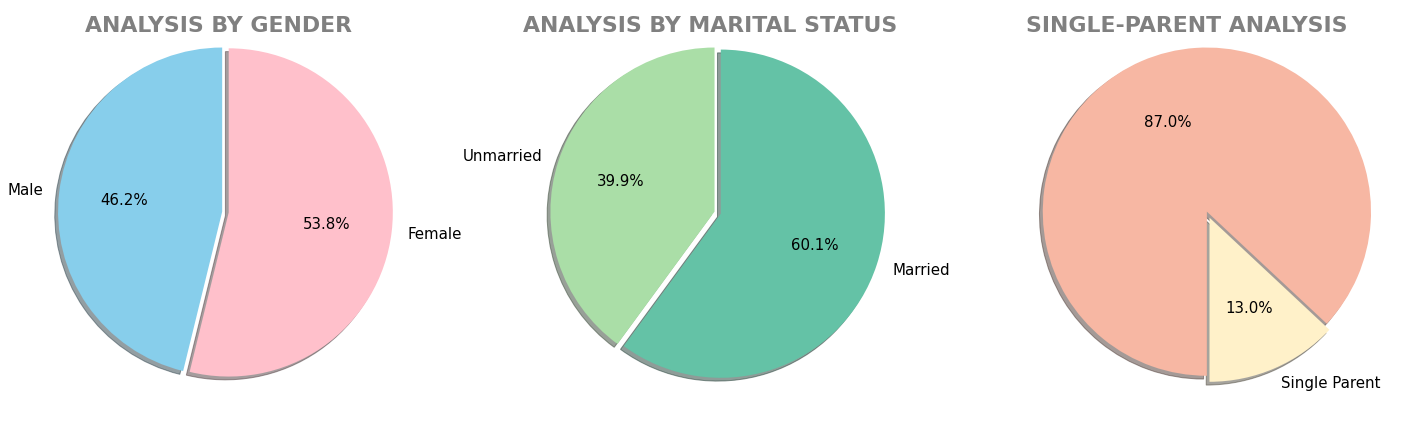

In [48]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (25,10))

# Check Genders
MaleGenderCount = (CarInssuranceDataframeImputedValues['GENDER']).value_counts()['M']
FemaleGenderCount = (CarInssuranceDataframeImputedValues['GENDER']).value_counts()['F']
# Plot the pie chart
labels= ['Male', 'Female']
sizes= [MaleGenderCount, FemaleGenderCount]
explode = (0, 0.04)
fig = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['skyblue','pink'], textprops={'fontsize': 15})
ax1.set_title('ANALYSIS BY GENDER', size=22, color='GREY', x=0.49, y=0.925, **{'fontname':'DejaVu Sans', 'weight':'bold' })

# Marital Status Count
NoMSTATUSCount = (CarInssuranceDataframeImputedValues['MSTATUS']).value_counts()['No']
YesMSTATUSCount = (CarInssuranceDataframeImputedValues['MSTATUS']).value_counts()['Yes']
# Plot the pie chart
labels= ['Unmarried', 'Married']
sizes= [NoMSTATUSCount, YesMSTATUSCount]
explode = (0, 0.04)
fig = ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#AADEA7','#64C2A6'], textprops={'fontsize': 15})
ax2.set_title('ANALYSIS BY MARITAL STATUS', size=22, color='GREY', x=0.49, y=0.925, **{'fontname':'DejaVu Sans', 'weight':'bold' })


# Single Parent Count
NoPARENT1Count = (CarInssuranceDataframeImputedValues['PARENT1']).value_counts()['No']
YesPARENT1Count = (CarInssuranceDataframeImputedValues['PARENT1']).value_counts()['Yes']
# Plot the pie chart
labels= [' ', 'Single Parent']
sizes= [NoPARENT1Count, YesPARENT1Count]
explode = (0, 0.04)
fig = ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=-90, counterclock=False, colors=['#F7B7A3','#FFF1C9'], textprops={'fontsize': 15})
ax3.set_title('SINGLE-PARENT ANALYSIS', size=22, color='GREY', x=0.45, y=0.925, **{'fontname':'DejaVu Sans', 'weight':'bold' })

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> After analyzing the car insurance dataset, it is evident that a higher percentage of females (<span style="font-weight: bold; color:blue;">53.8%</span>) opt for car insurance compared to males (<span style="font-weight: bold; color:blue;">46.2%</span>). Furthermore, <span style="font-weight: bold; color:blue;">60%</span> of the customers in the dataset are married, and approximately <span style="font-weight: bold; color:blue;">13%</span> are single parents.<br>
    </li>
    <br>
</ul>
</div>


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Education and Occupation</li>
</ul>

In [49]:
# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs)


# Education Pie Chart
PhDCount = (CarInssuranceDataframeImputedValues['EDUCATION']).value_counts()['PhD']
HighSchoolCount = (CarInssuranceDataframeImputedValues['EDUCATION']).value_counts()['High School']
BachelorsCount = (CarInssuranceDataframeImputedValues['EDUCATION']).value_counts()['Bachelors']
MastersCount = (CarInssuranceDataframeImputedValues['EDUCATION']).value_counts()['Masters']
# Plot the pie chart
labels= ['PhD', 'High School', 'Bachelors', 'Masters']
sizes= [PhDCount, HighSchoolCount, BachelorsCount, MastersCount]
fig.add_trace(go.Pie(labels=labels, values=sizes, hole=.6, hoverinfo="label+value", marker_colors=px.colors.sequential.Teal), 1, 1)


# Occupation Pie Chart
checkOccupationDataFrame = CarInssuranceDataframeImputedValues.copy()
# Occupations Count
ProfessionalCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Professional']
z_BlueCollarCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Blue Collar']
ManagerCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Manager']
ClericalCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Clerical']
DoctorCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Doctor']
LawyerCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Lawyer']
HomeMakerCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Home Maker']
StudentCount = (checkOccupationDataFrame['OCCUPATION']).value_counts()['Student']
# Plot the pie chart
labels = ['Professional', 'Blue Collar', 'Manager', 'Clerical', 'Doctor', 'Lawyer', 'Home Maker', 'Student']
values = [ProfessionalCount, z_BlueCollarCount, ManagerCount, ClericalCount, DoctorCount, LawyerCount, HomeMakerCount,StudentCount]
fig.add_trace(go.Pie(labels=labels, values=values, hole=.6, hoverinfo="label+value", marker_colors=px.colors.sequential.Purples), 1, 2)

fig.update_layout(
    margin=dict(l=40, r=120, t=50, b=10),
    title={
        'text': "ANALYSIS BY EDUCATION                                        ANALYSIS BY OCCUPATION",
        'y':0.95,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',}, 
    title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}
)
fig.update(layout_showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> After analyzing the car insurance dataset, it is evident that the majority of individuals who take insurance have completed their high school education, accounting for <span style="font-weight: bold; color:blue;">43.4%</span> of the customers. Following that, <span style="font-weight: bold; color:blue;">27.4%</span> have a bachelor's degree, <span style="font-weight: bold; color:blue;">20.02%</span> have a master's degree, and <span style="font-weight: bold; color:blue;">9.07%</span> have a PhD.<br>

In terms of occupation, the highest percentage of customers, <span style="font-weight: bold; color:blue;">28.7%</span>, are engaged in blue-collar work. The second-highest occupation category is clerical, accounting for <span style="font-weight: bold; color:blue;">15.4%</span> of the customers. Other occupations make up the remaining percentage of insured individuals.<br>
    </li>
</ul>
</div>


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Car Usage, Car Type and Red Cars</li>
</ul>

In [50]:
# Create subplots for pie charts
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs)

# Car Usage Pie Chart
PrivateCount = (CarInssuranceDataframeImputedValues['CAR_USE']).value_counts()['Private']
CommercialCount = (CarInssuranceDataframeImputedValues['CAR_USE']).value_counts()['Commercial']
labels= ['Private', 'Commercial']
sizes= [ PrivateCount, CommercialCount]
# Plot the pie chart
fig.add_trace(go.Pie( values=sizes, labels = labels, hoverinfo="label+value", marker_colors=px.colors.sequential.Viridis), 1, 1)

# Car Type Pie Chart
MinivanCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['Minivan']
VanCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['Van']
SUVCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['SUV']
SportsCarCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['Sports Car']
PanelTruckCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['Panel Truck']
PickupCount = (CarInssuranceDataframeImputedValues['CAR_TYPE']).value_counts()['Pickup']
# Plot the pie chart
labels= ['Minivan', 'Van', 'SUV', 'Sports Car','Panel Truck','Pickup']
sizes= [ MinivanCount, VanCount, SUVCount, SportsCarCount, PanelTruckCount, PickupCount]
fig.add_trace(go.Pie(labels=labels, values=sizes, hoverinfo="label+value", marker_colors=px.colors.sequential.Plasma), 1, 2)

# Red Car Pie Chart
NoREDCARCount = (CarInssuranceDataframeImputedValues['RED_CAR']).value_counts()['no']
YesREDCARCount = (CarInssuranceDataframeImputedValues['RED_CAR']).value_counts()['yes']
# Plot the pie chart
labels = ['Other Cars','Red Cars']
values = [NoREDCARCount, YesREDCARCount]
fig.add_trace(go.Pie(labels=labels, values=values, hoverinfo="label+value", marker_colors=px.colors.sequential.RdBu), 1, 3)

fig.update_layout(
    margin=dict(l=40, r=120, t=50, b=10),
    title={
        'text': "ANALYSIS BY CAR USAGE              ANALYSIS BY CAR TYPE               ANALYSIS BY RED CARS",
        'y':0.95,
        'x':0.46,
        'xanchor': 'center',
        'yanchor': 'top',}, 
    title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}
)
fig.update(layout_showlegend=False)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> After analyzing the car insurance dataset, it is evident that the majority of individuals who take insurance use their car for private purposes, accounting for <span style="font-weight: bold; color:blue;">63.2%</span> of the customers.<br>
When considering car types, the highest percentage of customers have SUVs, comprising <span style="font-weight: bold; color:blue;">28%</span> of the insured individuals. The second-highest car type is minivans, accounting for <span style="font-weight: bold; color:blue;">26.2%</span> of the customers. The remaining percentage of insured individuals is distributed among pickup trucks and other car types.<br>
Regarding the Red Cars, the majority of customers do not have red cars, with <span style="font-weight: bold; color:blue;">71.1%</span> of them opting for other colors.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Licenses Revoked</li>
</ul>

In [51]:
# Car Usage Pie Chart
YesRevokedCount = (CarInssuranceDataframeImputedValues['REVOKED']).value_counts()['Yes']
NoRevokedCount = (CarInssuranceDataframeImputedValues['REVOKED']).value_counts()['No']
# Percentage of Genders in Dataframe
YesRevokedPercentage=(YesRevokedCount/CarInssuranceDataframeImputedValues['REVOKED'].count())*100
NoRevokedPercentage=(NoRevokedCount/CarInssuranceDataframeImputedValues['REVOKED'].count())*100

top_labels = ['Yes', 'No']
colors = ['rgb(38, 24, 74, 0.8)', 'rgb(164, 163, 204, 0.85)']
x_data = [[round(YesRevokedPercentage, 1), round(NoRevokedPercentage, 1)]]
y_data = ['Previously revoked<br> license holders']

fig = go.Figure()

for i in range(0, len(top_labels)):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar( x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    
    {'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'
    },
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    margin=dict(l=10, r=150, t=100, b=120),
    showlegend=False,
    title={
        'text': "ANALYSIS BY LICENSE",
        'y':0.95,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top',}, 
    title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial Black', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(top_labels)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations)
fig.update_traces(hoverinfo='skip')

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li> After analyzing the car insurance dataset, it is evident that a small percentage of individuals, specifically <span style="font-weight: bold; color:blue;">12.2%</span>, have had their licenses revoked. This indicates that there are less risky drivers in dataset.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Location</li>
</ul>

In [52]:
# Car Usage Pie Chart
UrbanCount = (CarInssuranceDataframeImputedValues['URBANICITY']).value_counts()['Highly Urban/ Urban']
RuralCount = (CarInssuranceDataframeImputedValues['URBANICITY']).value_counts()['Highly Rural/ Rural']

fig = go.Figure(go.Funnel(
    y = ["Highly Urban/ Urban", "Highly Rural/ Rural"],
    x = [UrbanCount, RuralCount],
    textposition = "inside",
    textinfo = "value+percent total",
    opacity = 0.9, marker = {"color": [ "lightsalmon", "teal"],
    "line": {"width": [4, 3, 2, 3, 1, 1], "color": ["wheat", "wheat"]}},
    connector = {"line": {"color": "black", "dash": "dot", "width": 3}})
    )

fig.update_layout(
    
    {'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'
    },
    margin=dict(l=10, r=10, t=50),
    showlegend=False,
    title={
        'text': "ANALYSIS BY LOCATION",
        'y':0.95,
        'x':0.53,
        'xanchor': 'center',
        'yanchor': 'top',}, 
    title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}
)
fig.update_traces(hoverinfo='skip')

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>After analyzing the car insurance dataset, it is evident that the majority of insured individuals reside in highly urban areas, accounting for <span style="font-weight: bold; color:blue;">80%</span> of the total. This indicates that car insurance is more prevalent among those living in densely populated urban areas.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Date of Birth</li>
</ul>

In [53]:
df=CarInssuranceDataframeImputedValues
x = df['BIRTH']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Histogram(x=x, histfunc='count' ,hoverinfo=('x+y'))])
# Customize aspect
fig.update_traces(marker_line_color='#371916', marker_color='#D2958E',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout({'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'},bargap=0.2, height=500, width=1200, title_text="ANALYSIS BY DATE OF BIRTH", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="BIRTH")
fig.update_yaxes(title_text="NUMBER OF PEOPLE")
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Upon analyzing the car insurance dataset, it becomes apparent that a significant proportion of insured individuals fall within the birth year range of <span style="font-weight: bold; color:blue;">1950-1960</span>, highlighting the higher propensity for individuals born during this period to possess car insurance coverage. Most of the customers that are <span style="font-weight: bold; color:blue;">250</span> are from <span style="font-weight: bold; color:blue;">1951</span><br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="30px" width="120" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;In a null shell:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>This project focuses on analyzing a dataset from an car insurance claim, containing information about individual customers, their socio-demographic profile, and vehicles details. It involves downloading, cleaning, and preparing the dataset </li><br>
    <li><span style="font-weight: bold; color:green;">1.</span> Frequency plots, also known as histograms, are utilized to visualize the distribution of variables in the dataset.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">2.</span> In discrete statistics, central tendency measures like mean, median, and mode determine average and frequently occurring values. Variability measures (range, standard deviation, variance) assess data spread. Skewness and kurtosis indicate distribution shape and concentration.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">3.</span> Outliers, data points deviating from the expected range, are handled using univariate and multivariate outlier analysis. The Interquartile Range (IQR) identifies univariate outliers, and multivariate outliers are replaced with mean values to avoid data loss.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">4.</span> Handling missing values is crucial. Numeric missing values are imputed with the mean or most frequent strategy. Categorical missing values are replaced with the most frequent value.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">5.</span> Correlation analysis is conducted to examine the relationships between variables. Positive and negative correlations indicate the direction and strength of the relationship, while weak or no correlation suggests little or no relationship. Coefficients range from -1 to 1, with 0 indicating no correlation, -1 showing perfect negative correlation, and 1 representing perfect positive correlation.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">6.</span> Normalization and scaling techniques are applied to numeric variables. Normalization transforms data to a normal distribution, while scaling brings it to a specific range (0-1). Techniques like z-score normalization and Min-Max scaling ensure fair comparison.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">7.</span> Grouping the data by age, gender, driving record and vehicle type provides insights into patterns and trends within each category.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">8.</span> Univariate analysis examines relationships within a single variable. It reveals females show a higher preference for insurance, and the majority of insured individuals are married, have completed high school, use cars privately, and live in urban areas. A small percentage have had their licenses revoked.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/univariate.png" align="left" hspace="25px" vspace="25px" width="100" height="80" ></p>
<ul style="list-style-type:none;">
<li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Bivariate and Multivarite analysis</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">  
<li> Analyzing relashionships between more than one variable to understand its distribution, central tendency, dispersion, and other characteristics.</li> 
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/categoricalData.png" align="left" hspace="25px" vspace="1px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:green"> Categorical to Categorical</li>
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue"> Analysis by Gender and Revoked License</li>
</ul>

In [54]:
x = df['GENDER']
y = df['REVOKED']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Histogram(x=x, y=y, histfunc='count')])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout({'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'},bargap=0.2, height=500, width=1200, title_text="GENDER VS REVOKED LICENSE", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="GENDER")
fig.update_yaxes(title_text="NUMBER OF REVOKED")
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graphical representation reveals a notable trend indicating that a <span style="font-weight: bold; color:blue;">larger</span> proportion of <span style="font-weight: bold; color:blue;">females</span> have revoked licenses compared to males.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Marital Status and Education</li>
</ul>

In [55]:
y = df['MSTATUS']
x = df['EDUCATION']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Histogram(x=x, y=y, histfunc='count')])
# Customize aspect
fig.update_traces(marker_line_color='#51087E', marker_color='#D7A1F9',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout({'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'},bargap=0.2, height=500, width=1200, title_text="MARITAL STATUS VS EDUCATION", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="EDUCATION")
fig.update_yaxes(title_text="NUMBER OF PEOPLE MARRIED")
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graphical representation highlights a significant trend, demonstrating that a higher percentage of insured married individuals hold a <span style="font-weight: bold; color:blue;">high school</span> degree compared to those with a bachelor's degree, followed by individuals with a master's degree, and finally, individuals with a PhD.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Marital Status and Occupation</li>
</ul>

In [56]:
y = df['MSTATUS']
x = df['OCCUPATION']

# Use the hovertext kw argument for hover text
fig = go.Figure(data=[go.Histogram(x=x, y=y, histfunc='count')])
# Customize aspect
fig.update_traces(marker_line_color='#1E4D3D', marker_color='#83CEB5',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout({'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'},bargap=0.2, height=500, width=1200, title_text="MARITAL STATUS VS OCCUPATION", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="OCCUPATION")
fig.update_yaxes(title_text="NUMBER OF PEOPLE MARRIED")
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graphical representation reveals a clear trend, indicating that a larger proportion of inssured married individuals are engaged in <span style="font-weight: bold; color:blue;">blue-collar</span> occupations compared to those in clerical positions, followed by professionals, managers, lawyers, students, home makers and doctors.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by different categorical columns</li>
</ul>

In [57]:
# Create subplots for pie charts
df= GroupByMVRPTS
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{}, {},{}],
           [{}, {},{}],
          [{}, {},{}]]
)

# Plot the bars
fig.add_trace(go.Histogram2d(x=df['EDUCATION'], y=df['OCCUPATION'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 1, 1)
fig.add_trace(go.Histogram2d(x=df['PARENT1'], y=df['MSTATUS'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 1, 2)
fig.add_trace(go.Histogram2d(x=df['CAR_USE'], y=df['OCCUPATION'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 1, 3)
fig.add_trace(go.Histogram2d(x=df['CAR_TYPE'], y=df['CAR_USE'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 2, 1)
fig.add_trace(go.Histogram2d(x=df['CAR_TYPE'], y=df['RED_CAR'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 2, 2)
fig.add_trace(go.Histogram2d(x=df['REVOKED'], y=df['RED_CAR'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 2, 3)
fig.add_trace(go.Histogram2d(x=df['REVOKED'], y=df['URBANICITY'], texttemplate= "%{z}", colorscale=[[0, 'rgb(12,51,131)'], [0.25, 'rgb(10,136,186)'], [0.5, 'rgb(242,211,56)'], [0.75, 'rgb(242,143,56)'], [1, 'rgb(217,30,30)']]), 3, 1)



fig.update_layout({'plot_bgcolor': 'rgb(0, 0, 0, 0)', 'paper_bgcolor': 'rgb(0, 0, 0, 0)'}, bargap=0.03, height=800, width=2200, showlegend=False)
, showscale=False
# Update xaxis properties
fig.update_xaxes(title_text="EDUCATION", row=1, col=1)
fig.update_xaxes(title_text="PARENT1", row=1, col=2)
fig.update_xaxes(title_text="CAR_USE", row=1, col=3)
fig.update_xaxes(title_text="CAR_TYPE", row=2, col=1)
fig.update_xaxes(title_text="CAR_TYPE", row=2, col=2)
fig.update_xaxes(title_text="REVOKED",row=2, col=3)
fig.update_xaxes(title_text="REVOKED", row=3, col=1)
fig.update_xaxes(title_text="TRAVTIME", row=3, col=2)
fig.update_xaxes(title_text="TIF", row=3, col=3)

# Update yaxis properties
fig.update_yaxes(title_text="OCCUPATION", row=1, col=1)
fig.update_yaxes(title_text="MSTATUS", row=1, col=2)
fig.update_yaxes(title_text="OCCUPATION", row=1, col=3)
fig.update_yaxes(title_text="CAR_USE", row=2, col=1)
fig.update_yaxes(title_text="RED_CAR", row=2, col=2)
fig.update_yaxes(title_text="RED_CAR", row=2, col=3)
fig.update_yaxes(title_text="URBANICITY", row=3, col=1)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=2)
fig.update_yaxes(title_text="FREQUENCY", row=3, col=3)
fig.update_traces(showscale=False)

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/numericData.png" align="left" hspace="25px" vspace="7px" width="50" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:green">Numerical to Numerical</li>
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Income, Previous Claims and Claim Frequency</li>
</ul>

In [58]:
fig = go.Figure()

fig=px.histogram(x=df['INCOME($)'], y=df['OLDCLAIM($)'], color=df['CLM_FREQ'] )
fig.update_layout(bargap=0.2, height=500, width=1200, title_text="(INCOME VS OLDCLAIM) VS CLM_FREQ", 
                  title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.update_xaxes(title_text="INCOME($)")
fig.update_yaxes(title_text="sum of OLDCLAIM($)")
fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph representing the relationship between income and oldclaim demonstrates that individuals with income ranging between <span style="font-weight: bold; color:blue;">20K-40K</span> tend to have a higher total amount claimed in the past. Interestingly, higher-income individuals tend to claim less. Additionally, when comparing claim frequency, it is observed that a significant portion of individuals who claimed once also fall within the income range of <span style="font-weight: bold; color:blue;">20K-40K</span>.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Income and Age</li>
</ul>

In [59]:
fig = go.Figure()

# Add traces
fig = px.histogram(x=df['INCOME($)'], y=df['AGE'] ,histfunc='avg')
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="(INCOME VS AGE", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.update_xaxes(title_text="INCOME($)")
fig.update_yaxes(title_text="AGE")

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph depicting the relationship between income and age reveals that individuals with the highest income tend to be around the average age of <span style="font-weight: bold; color:blue;">35</span>. On the other hand, individuals with lower income levels are more commonly observed among the age group of <span style="font-weight: bold; color:blue;">40</span> years and above.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/numericCategoric.png" align="left" hspace="25px" vspace="5px" width="60" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:green">Categorical to Numerical</li>
</ul>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis Education, Previous Claim Amount and Future Claim Amount</li>
</ul>

In [60]:
df = CarInssuranceDataframeImputedValues
fig = go.Figure()

fig.add_trace(go.Violin(x=df['EDUCATION'],
                        y=df['OLDCLAIM($)'],
                        legendgroup='OLDCLAIM', scalegroup='OLDCLAIM', name='OLDCLAIM',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=df['EDUCATION'],
                        y=df['CLM_AMT($)'],
                        legendgroup='CLM_AMT', scalegroup='CLM_AMT', name='CLM_AMT',
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_xaxes(title_text="EDUCATION")
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="EDUCATION (OLDCLAIM VS CLM_AMT)", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph illustrating the relationship between education, old claims, and future claims indicates that individuals with a <span style="font-weight: bold; color:blue;">PhD</span> degree tend to have higher claim amounts compared to individuals with other educational backgrounds. Furthermore, the graph suggests that individuals with a <span style="font-weight: bold; color:blue;">high school</span> diploma and <span style="font-weight: bold; color:blue;">bachelor's</span> degree are more likely to make future claims.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Occupation and Income</li>
</ul>

In [61]:
fig= px.violin(df, y=df['INCOME($)'], x=df["OCCUPATION"], color=df["OCCUPATION"],
                violinmode='overlay',
                box=True, hover_data=df.columns)
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="OCCUPATION VS INCOME", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph depicting the relationship between income and occupation shows that individuals that are <span style="font-weight: bold; color:blue;">doctors</span>, tend to have higher incomes compared to individuals in other occupations.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Education and Income</li>
</ul>

In [62]:
fig= px.violin(df, y=df['INCOME($)'], x=df["EDUCATION"], color=df["EDUCATION"],
                violinmode='overlay',
                box=True, hover_data=df.columns)
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="EDUCATION VS INCOME", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph illustrating the relationship between income and education level reveals that individuals with a <span style="font-weight: bold; color:blue;">bachelor</span>'s degree tend to have higher incomes compared to individuals with other education levels.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Education and Age</li>
</ul>

In [63]:
fig= px.violin(df, y=df['AGE'], x=df['EDUCATION'], color=df['EDUCATION'],
                violinmode='overlay',
                box=True, points="all", hover_data=df.columns)
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="EDUCATION VS AGE", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph depicting the relationship between age and education reveals that individuals above the age of <span style="font-weight: bold; color:blue;">70</span> tend to have a higher percentage of individuals with a bachelor's degree compared to other education levels.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/analysis.png" align="left" hspace="25px" vspace="1px" width="80" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Analysis by Occupation and Age</li>
</ul>

In [64]:
fig= px.violin(df, y=df['AGE'], x=df['OCCUPATION'], color=df['OCCUPATION'],
                violinmode='overlay',
                box=True, points="all", hover_data=df.columns)
fig.update_layout(bargap=0.03, height=500, width=1200, showlegend=True, title_text="OCCUPATION VS AGE", title_font = {"size": 22, "color": 'grey', 'family':'Arial Black'}, title={ 'x':0.5,'xanchor': 'center','yanchor': 'top'})

fig.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Based on the analysis of the car insurance dataset, the graph illustrating the relationship between age and education reveals that individuals above the age of <span style="font-weight: bold; color:blue;">73</span> are predominantly professionals.<br>
    </li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="30px" width="120" height="80"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;In a null shell:</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>Bivariate and multivariate analysis examines the relationships between variables. By considering two or more variables simultaneously, this analysis provides insights into how they interact and influence each other, contributing to a deeper understanding of the data.</li><br>
    <li><span style="font-weight: bold; color:green;">1.</span> Categorical to categorical analysis reveals trends such as higher proportions of females with revoked licenses and married individuals with a high school degree.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">2.</span> Numerical to numerical analysis shows income affecting claim amounts and frequencies.</li>
    <br>
    <li><span style="font-weight: bold; color:green;">3.</span> Categorical to numerical analysis reveals higher claim amounts for PhD holders and higher incomes for doctors. Additionally, individuals above 73 years old predominantly belong to professional occupations.</li>
    <br>
    <li>In a nut shell, this project involves exploring and pre-processing the auto insurance dataset. It includes frequency plots, discrete statics, central tendency measures, variability measures, outlier treatment, handling missing values, correlation analysis, normalisation, scaling, grouping, uivariate, bivariate and multivariate analysis. These steps aid in understanding the dataset, identifying patterns, and preparing data for further analysis and modelling.</li><br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/refrences-logo.png" align="left" hspace="0px" vspace="7px" width="120" height="80"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;Refrences:</li>
</ul>      

<div class="alert alert-warning" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. <span style="font-weight: bold; color:#122ecc;"> https://matplotlib.org/</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> https://seaborn.pydata.org/</li>     
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;">https://plotly.com/</li>     
    <br> 
    <li>4. <span style="font-weight: bold; color:#122ecc;">https://www.pngegg.com/</li>  
    <br> 
    <li>5. <span style="font-weight: bold; color:#122ecc;">https://www.wikipedia.de/</li> 
    <br>   
    <li>6. <span style="font-weight: bold; color:#122ecc;">https://www.canva.com/</li> 
    <br>   
    <li>7. <span style="font-weight: bold; color:#122ecc;">https://stackoverflow.com/</li>
    <br>   
    <li>7. <span style="font-weight: bold; color:#122ecc;">https://medium.com/</li>
    <br>
</ul>
</div>

 <center><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/Thankyou.gif" class="center" hspace="0px" vspace="0px" width=400 height=0></center>